In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
#import data
pf = pd.read_csv('June_15_2022.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0  1000  2022  6152022  33.029  53.594  31.153  40.553426  0.250954  0.237408   
1  1001  2022  6152022  32.756  52.302  29.227  39.423649  0.255848  0.229796   
2  1002  2022  6152022  34.515  54.279  31.105  41.251328  0.246518  0.222583   
3  1003  2022  6152022  33.282  53.613  29.498  40.216818  0.261438  0.233972   
4  1004  2022  6152022  37.163  58.029  31.844  43.827289  0.254240  0.219199   

       VARI  ...     bottom  Crop Flw(M   Crop Flw(V   Elevation(  Moisture(%  \
0  0.370741  ...  44.077733   21.445978  1378.032271  1144.984501   18.343122   
1  0.350092  ...  44.077694   20.089002  1290.613230  1144.674350   18.378409   
2  0.342596  ...  44.077655   18.870314  1212.318597  1144.504079   18.439327   
3  0.354217  ...  44.077616   19.452807  1249.732449  1144.483531   18.449580   
4  0.329387  ...  44.077577   20.406566  1311.176347  1144.615759   18.472988   

    Yld Mass(D  Yld Vol(Dr  id_old          X          Y  
0  12617.80980  225.317795    1196 -93.529936  44.077728  
1  12522.51934  223.616191    1197 -93.529936  44.077689  
2  12175.47616  217.418975    1198 -93.529936  44.077650  
3  12410.77387  221.620726    1199 -93.529936  44.077611  
4  12654.08193  225.965506    1200 -93.529936  44.077572  

[5 rows x 35 columns]

In [34]:
def plot_correlation_graphs_6_15_2022(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_15_2022.png', bbox_inches='tight')
    plt.show()

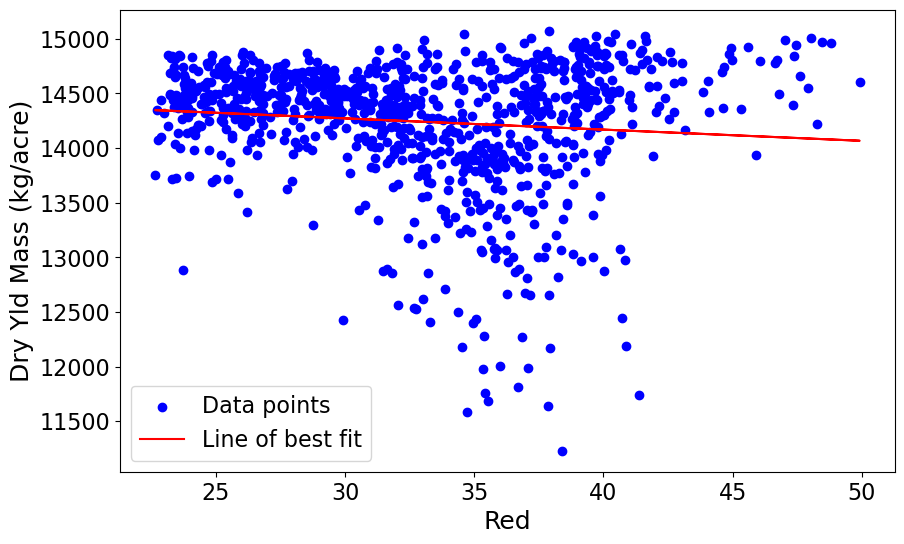

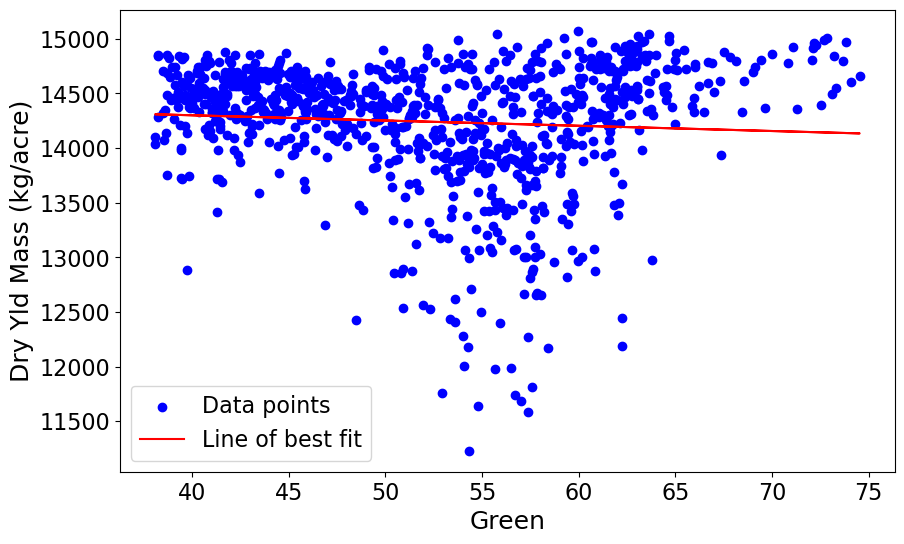

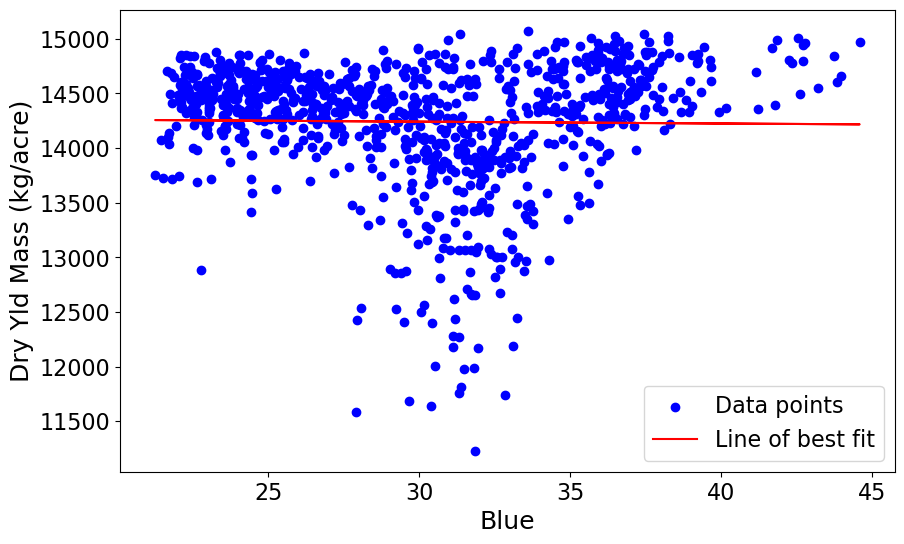

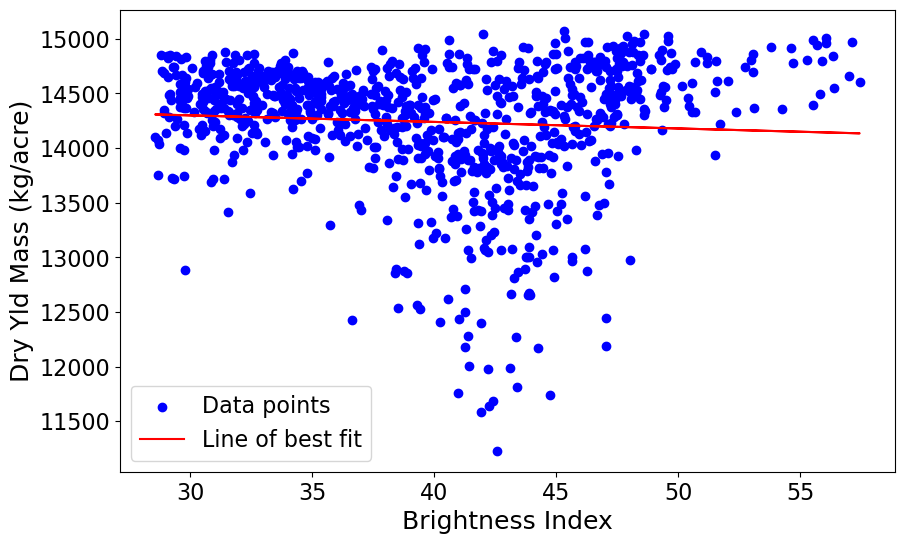

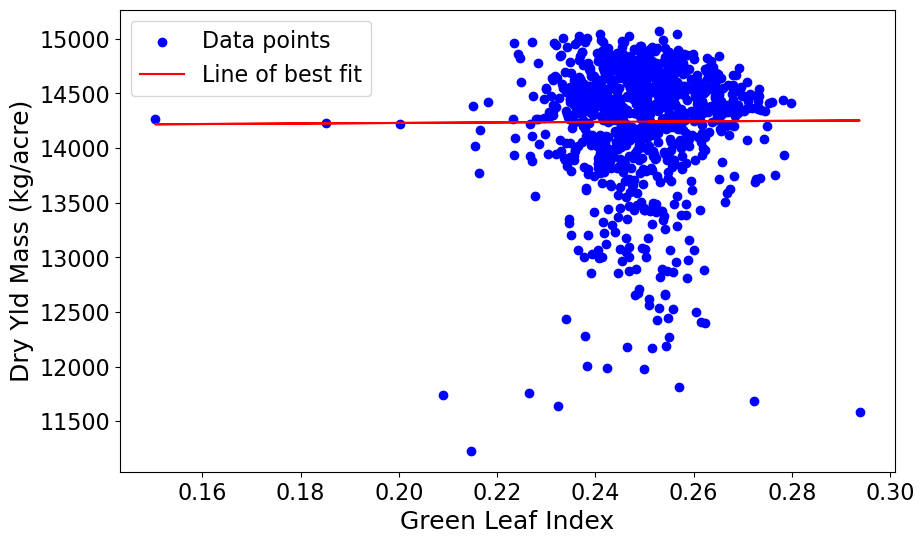

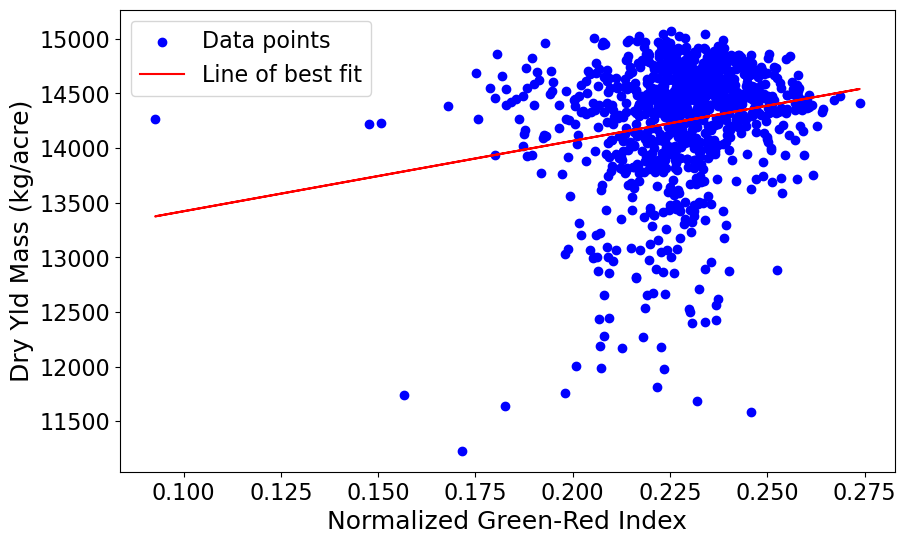

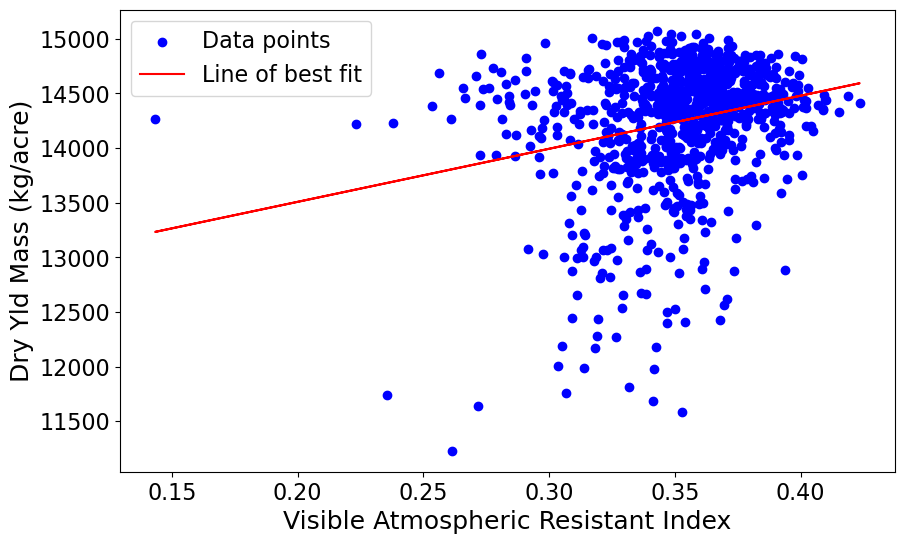

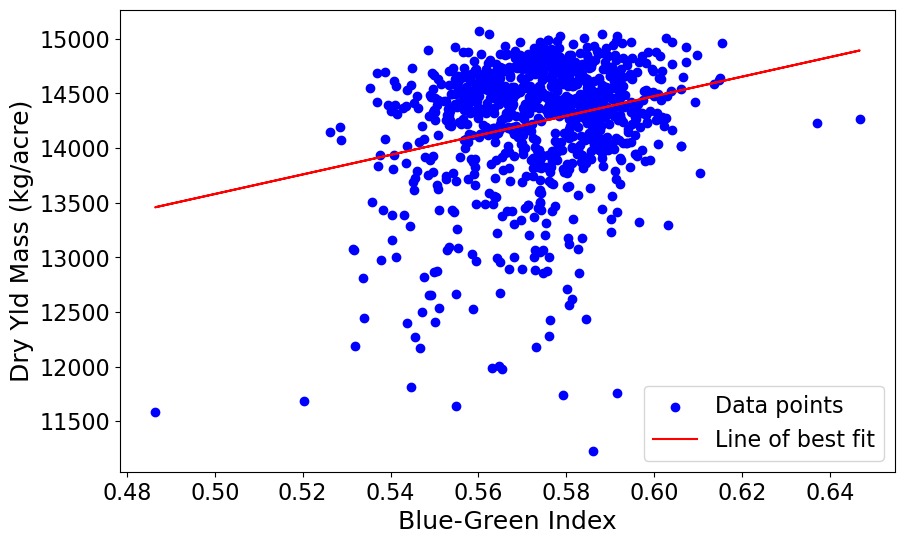

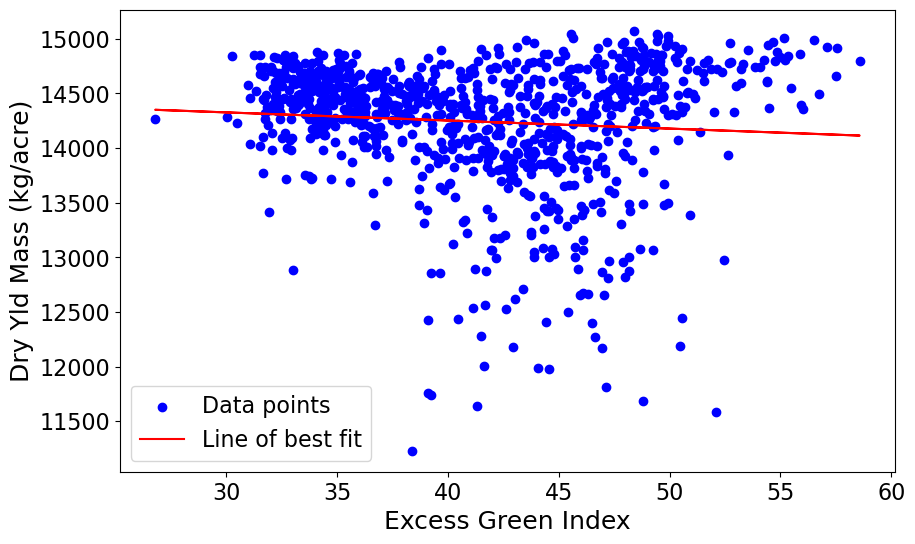

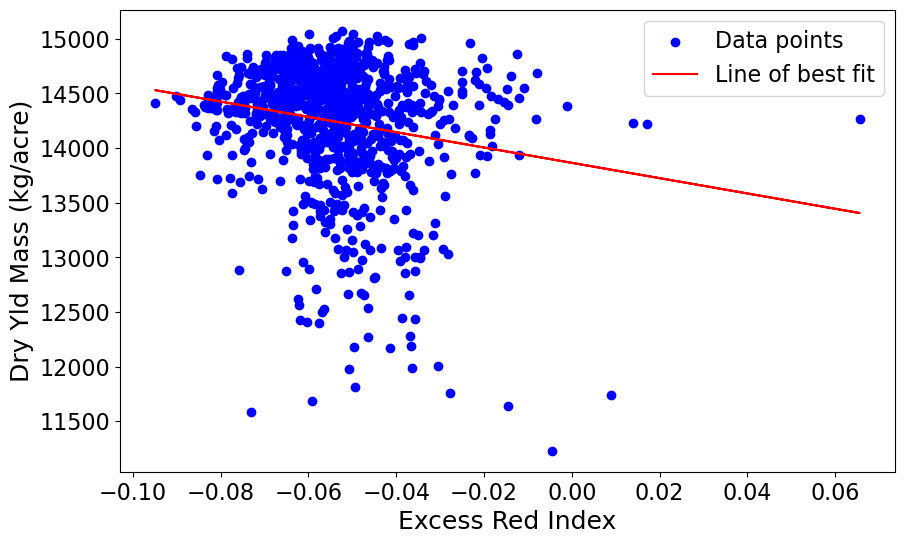

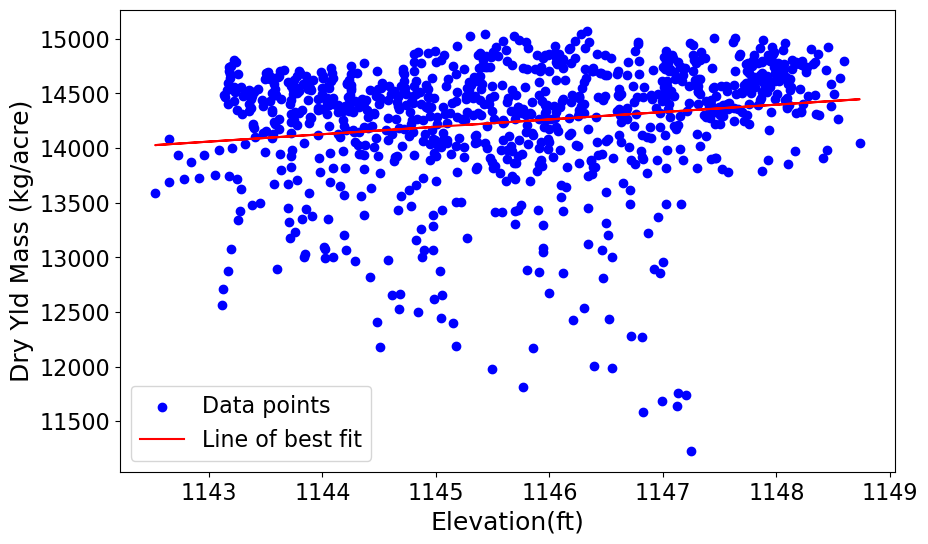

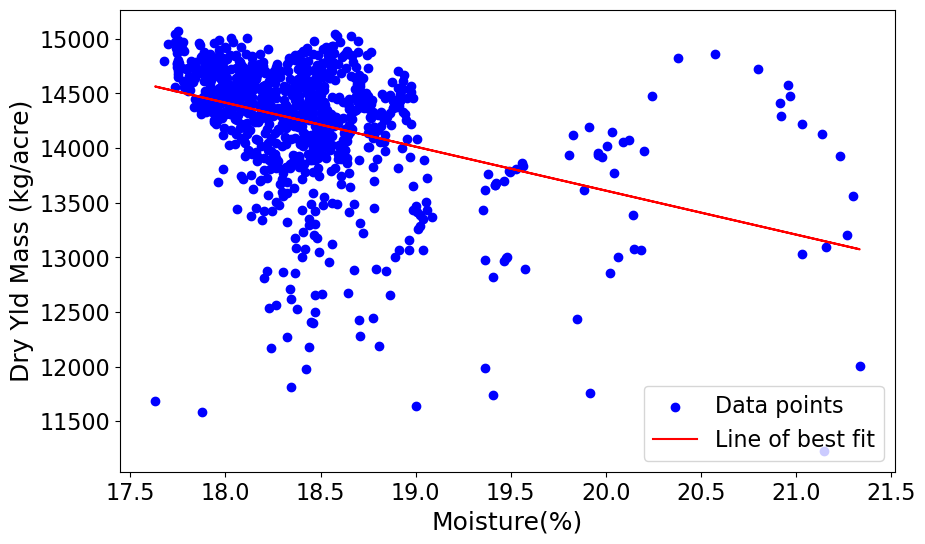

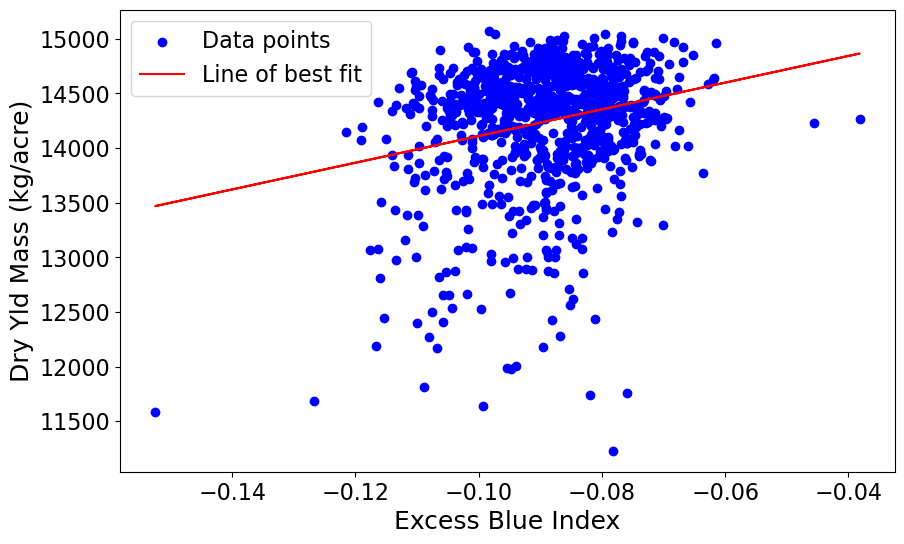

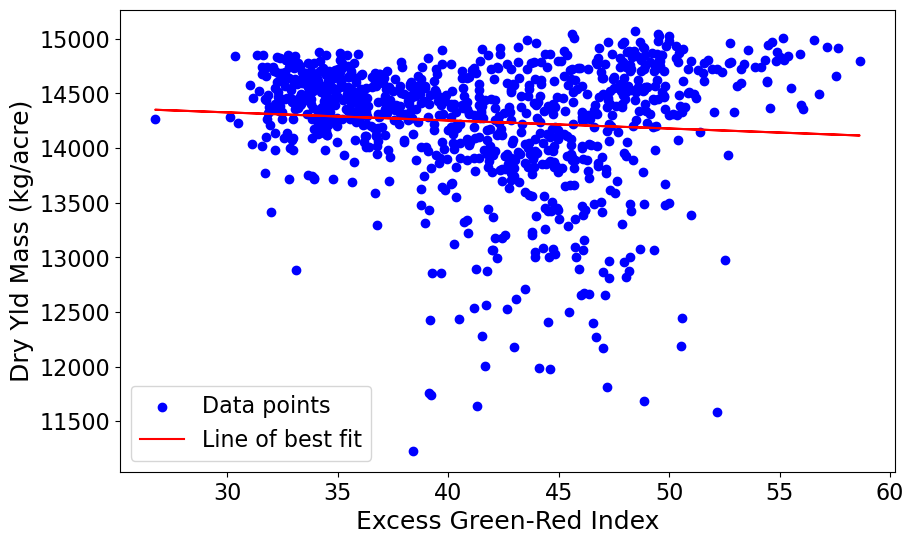

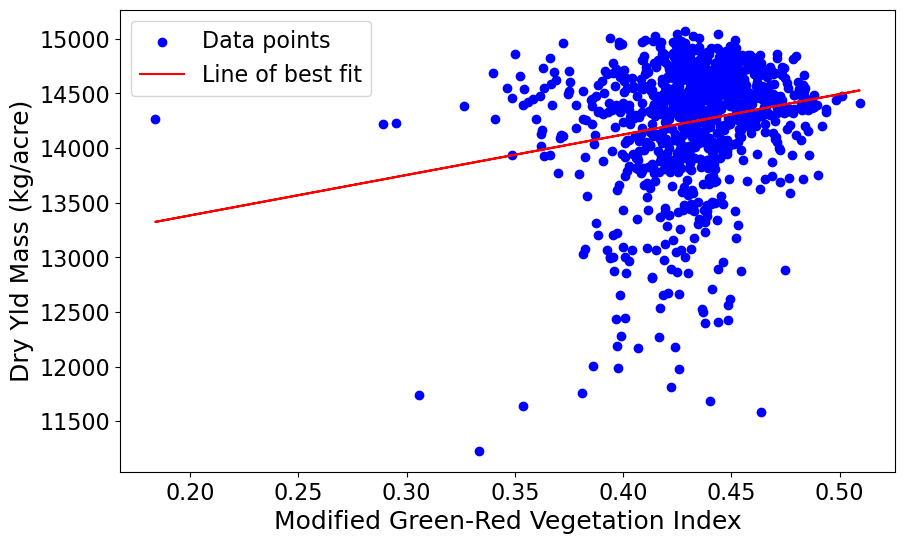

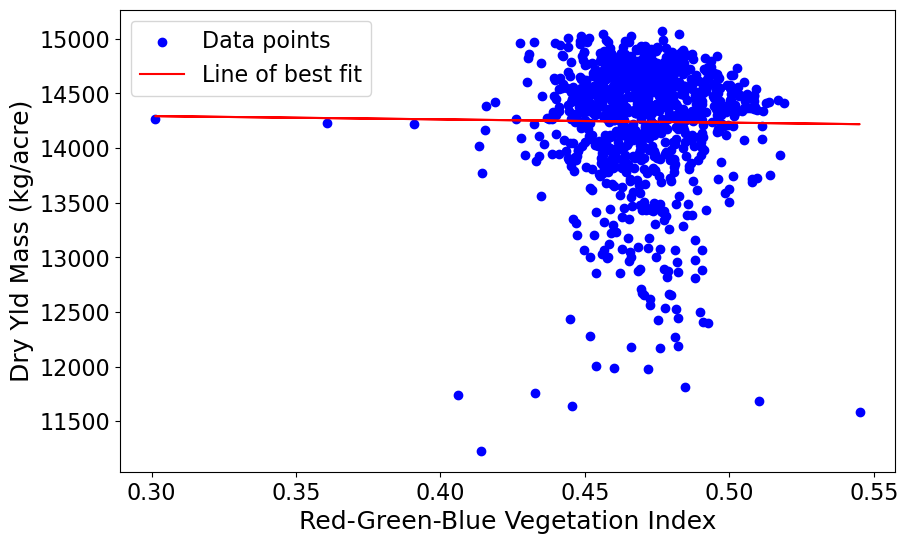

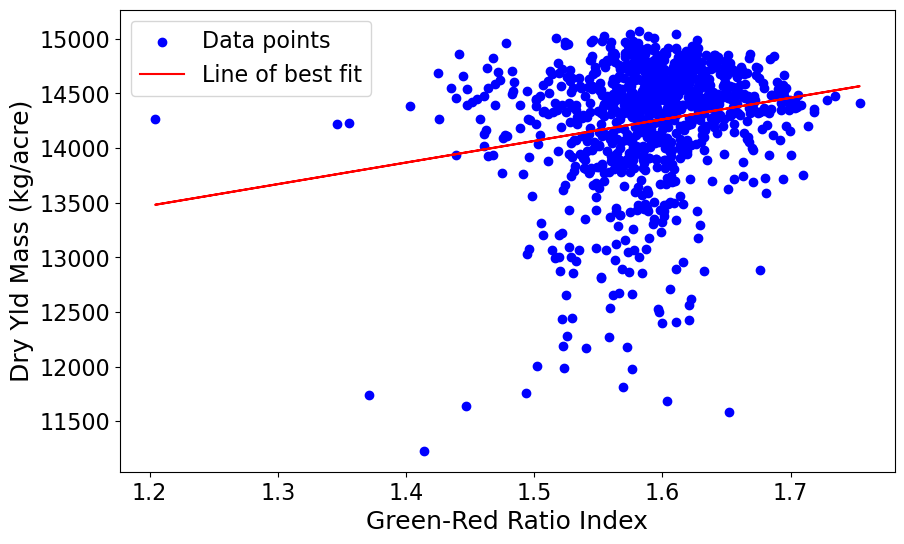

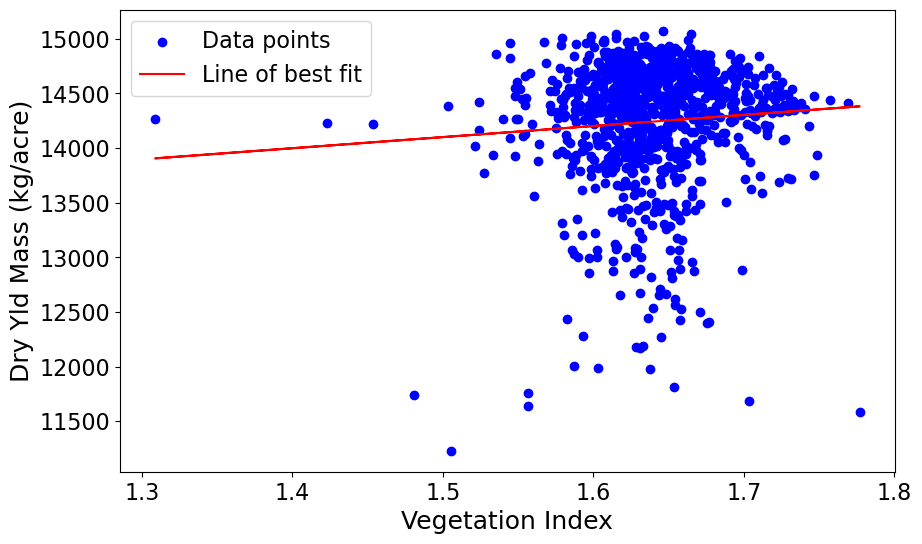

In [36]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_15_2022(pf, var, dependent_var, title)

In [37]:
#import data
pf = pd.read_csv('June_23_2022.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0  1000  2022  6232022  59.960  87.573  53.330  68.576772  0.214453  0.187165   
1  1001  2022  6232022  59.553  87.254  53.707  68.420909  0.212838  0.188690   
2  1002  2022  6232022  64.061  90.055  57.559  71.941535  0.193849  0.168665   
3  1003  2022  6232022  59.564  86.351  52.391  67.698307  0.213404  0.183579   
4  1004  2022  6232022  61.770  88.861  54.474  69.950523  0.209133  0.179850   

       VARI  ...     bottom  Crop Flw(M   Crop Flw(V   Elevation(  Moisture(%  \
0  0.293122  ...  44.077733   21.445978  1378.032271  1144.984501   18.343122   
1  0.297540  ...  44.077694   20.089002  1290.613230  1144.674350   18.378409   
2  0.269209  ...  44.077655   18.870314  1212.318597  1144.504079   18.439327   
3  0.286418  ...  44.077616   19.452807  1249.732449  1144.483531   18.449580   
4  0.281737  ...  44.077577   20.406566  1311.176347  1144.615759   18.472988   

    Yld Mass(D  Yld Vol(Dr  id_old          X          Y  
0  12617.80980  225.317795    1196 -93.529936  44.077728  
1  12522.51934  223.616191    1197 -93.529936  44.077689  
2  12175.47616  217.418975    1198 -93.529936  44.077650  
3  12410.77387  221.620726    1199 -93.529936  44.077611  
4  12654.08193  225.965506    1200 -93.529936  44.077572  

[5 rows x 35 columns]

In [38]:
def plot_correlation_graphs_6_23_2022(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_23_2022.png', bbox_inches='tight')
    plt.show()

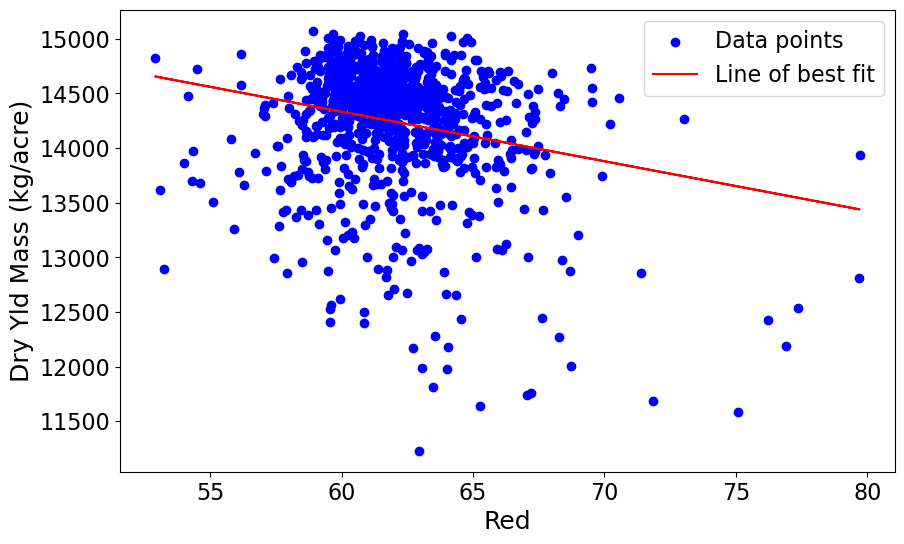

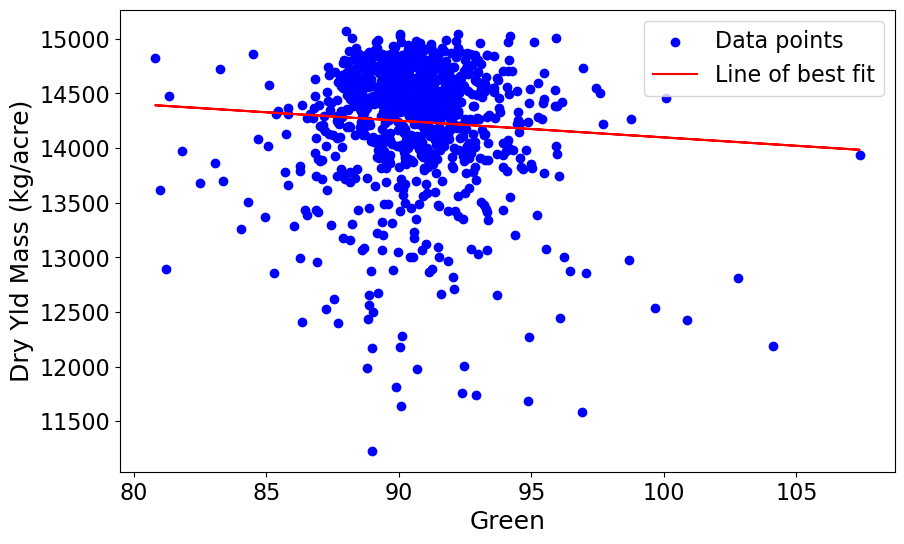

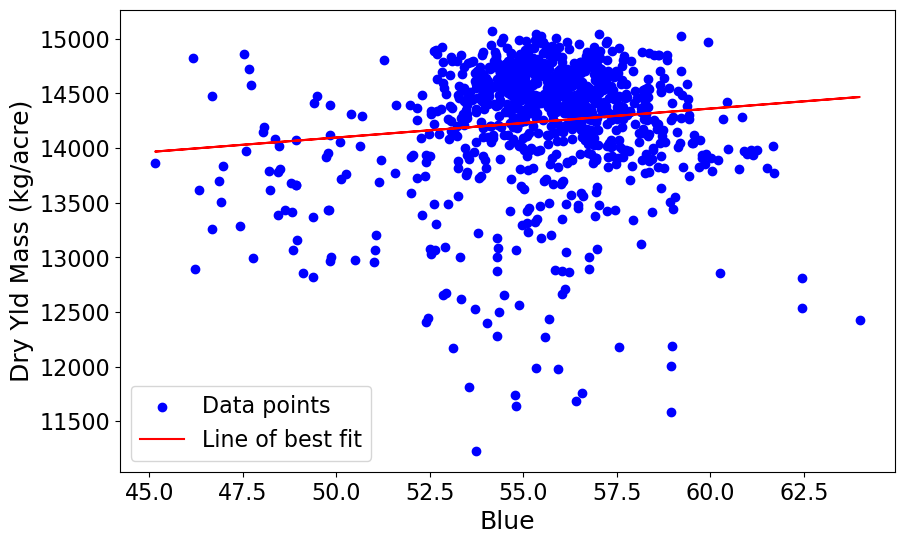

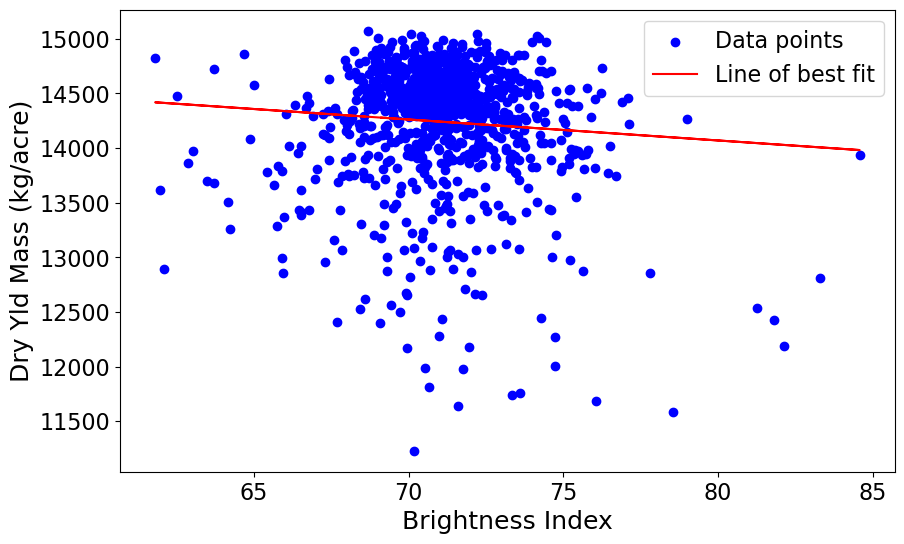

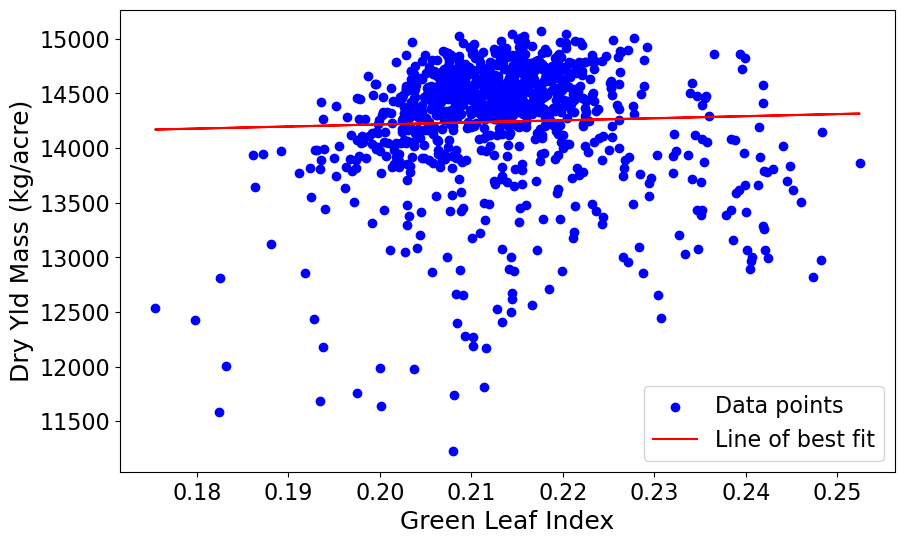

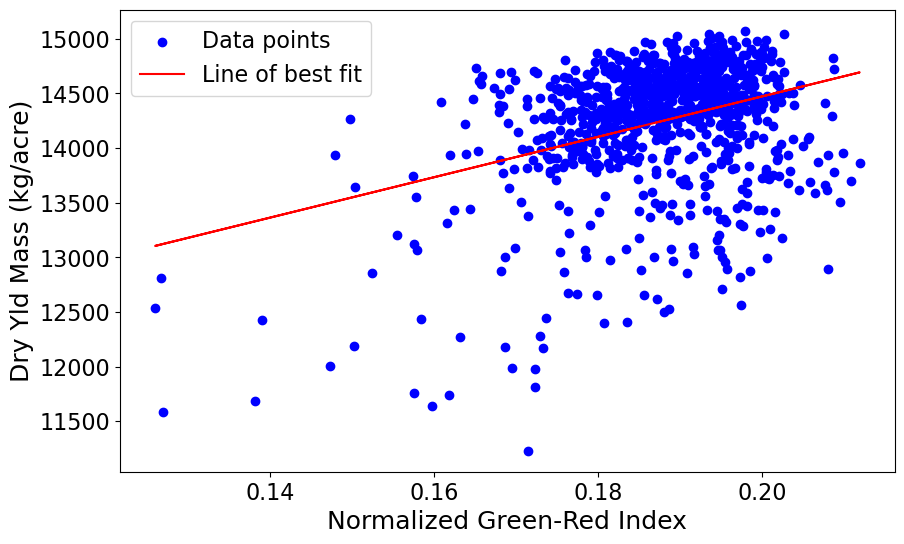

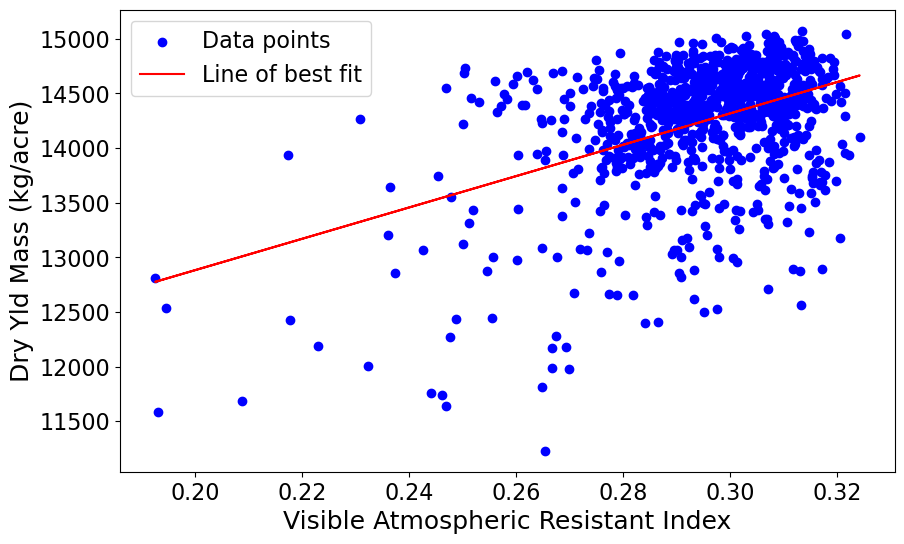

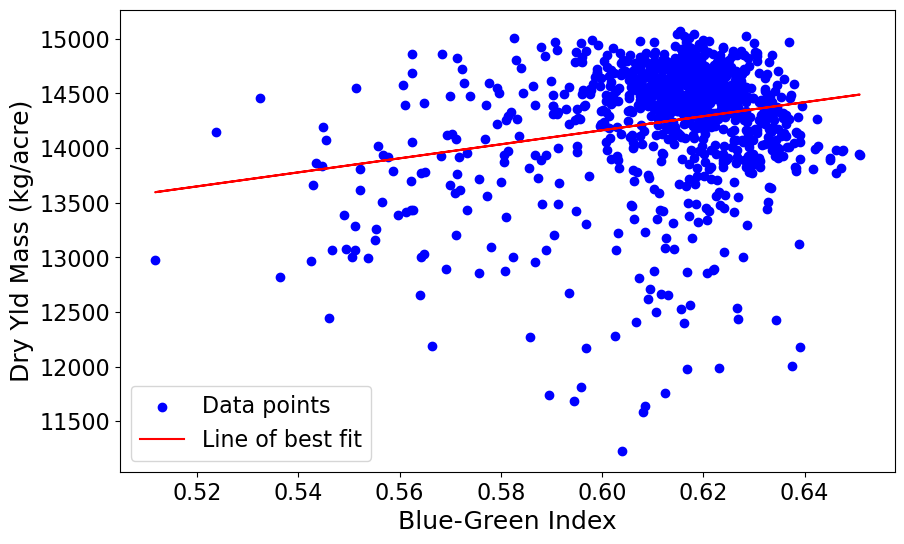

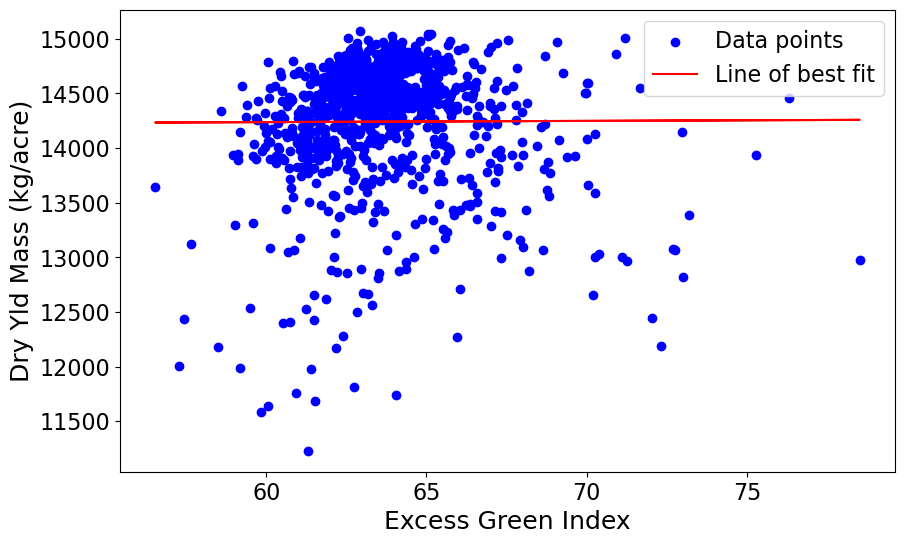

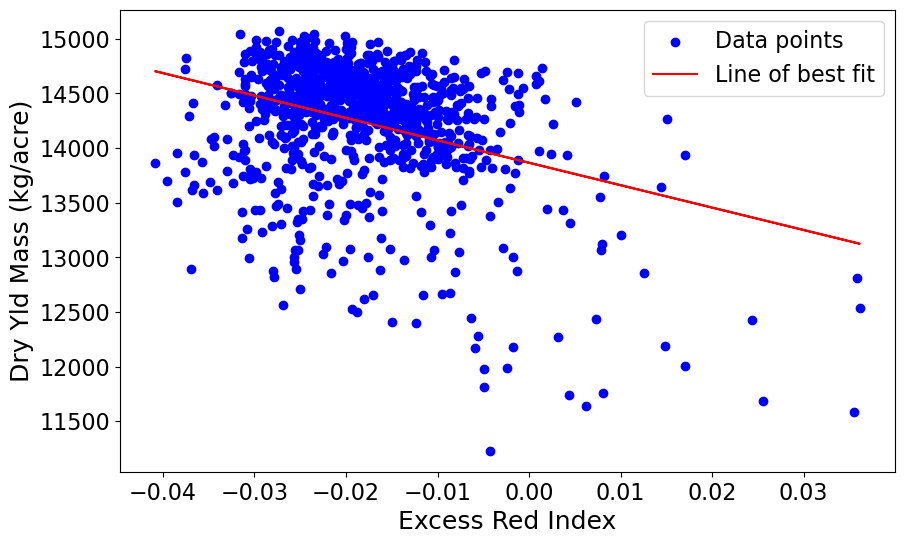

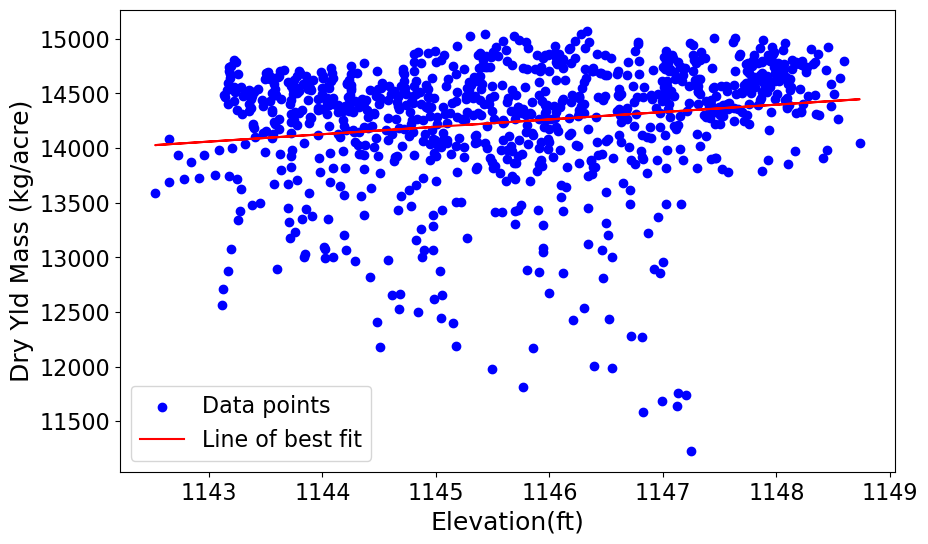

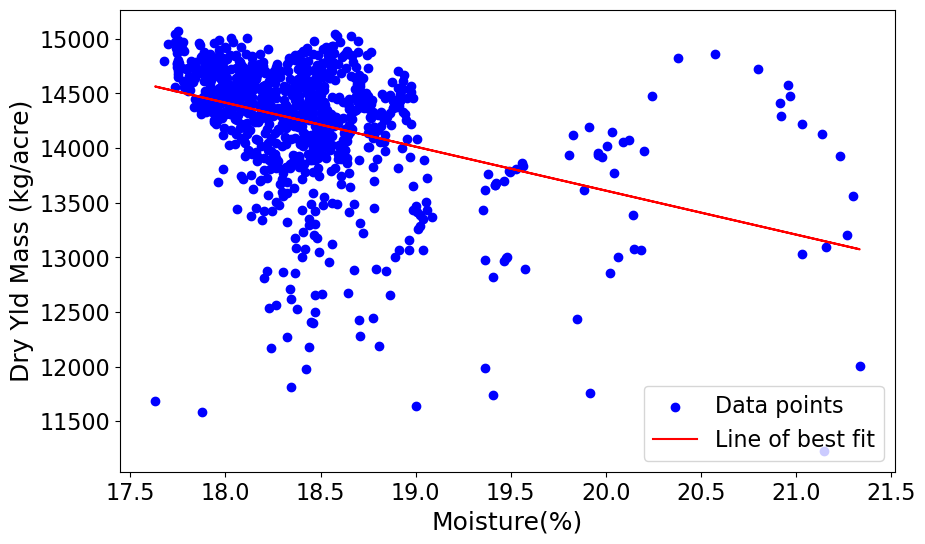

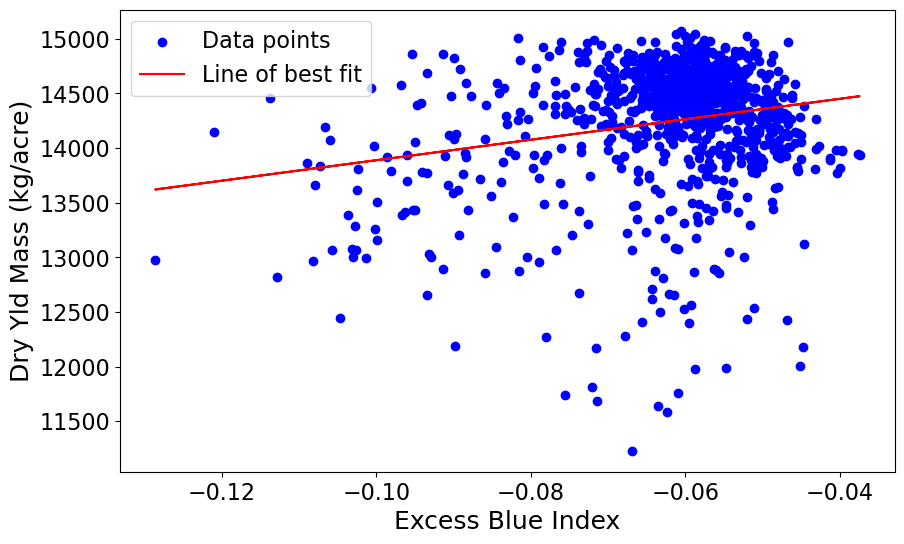

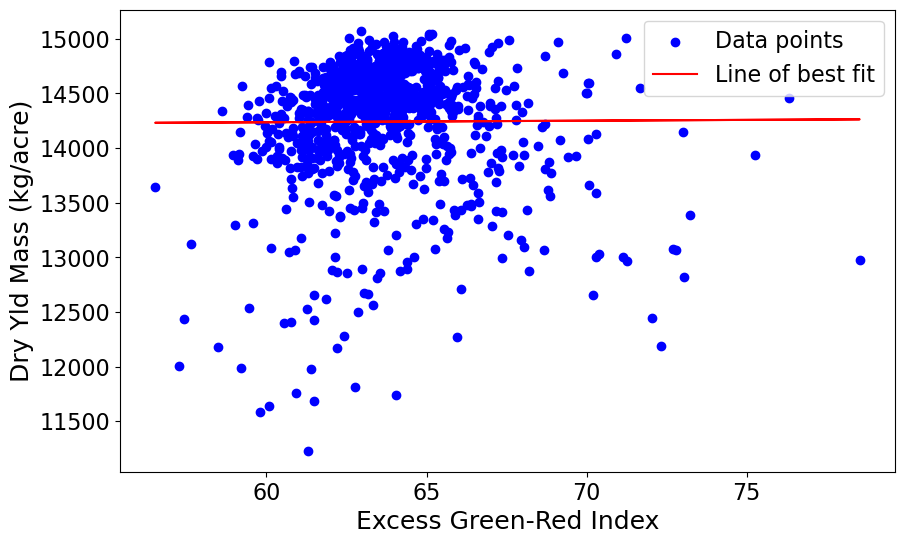

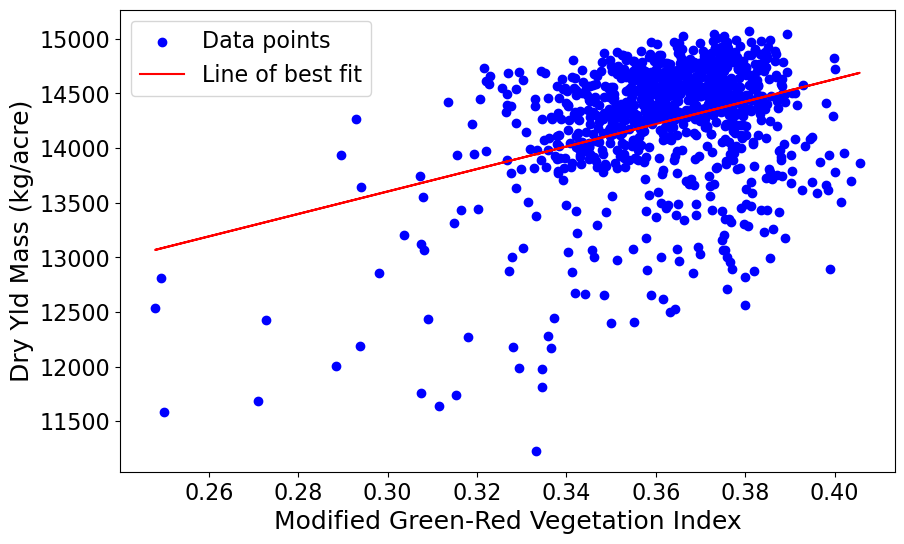

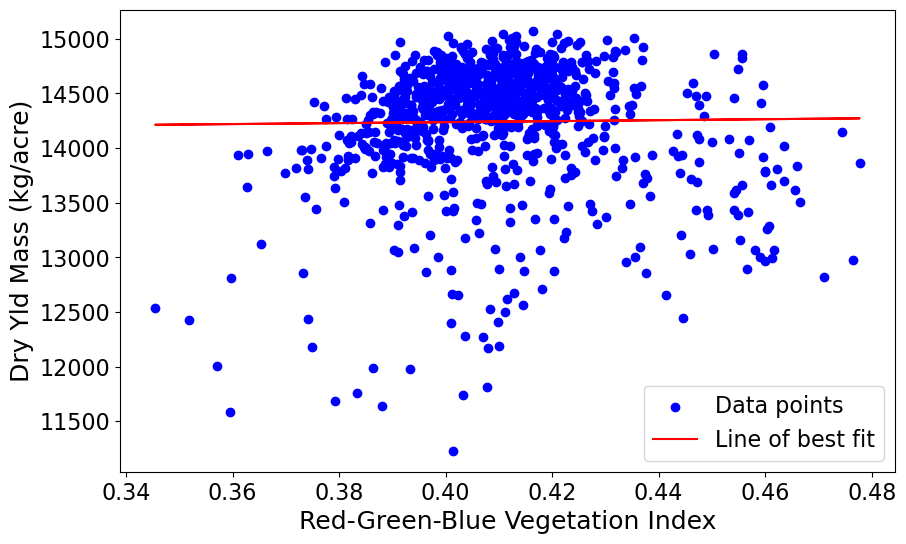

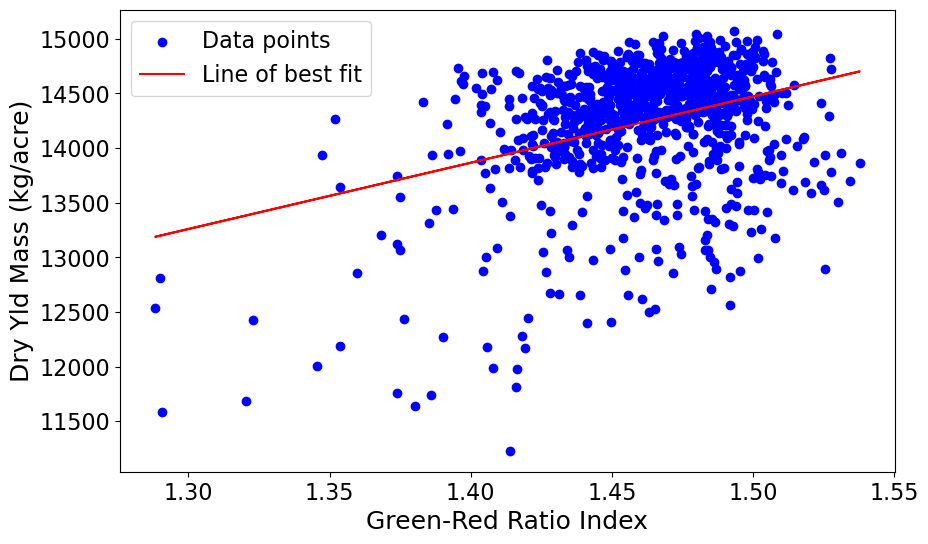

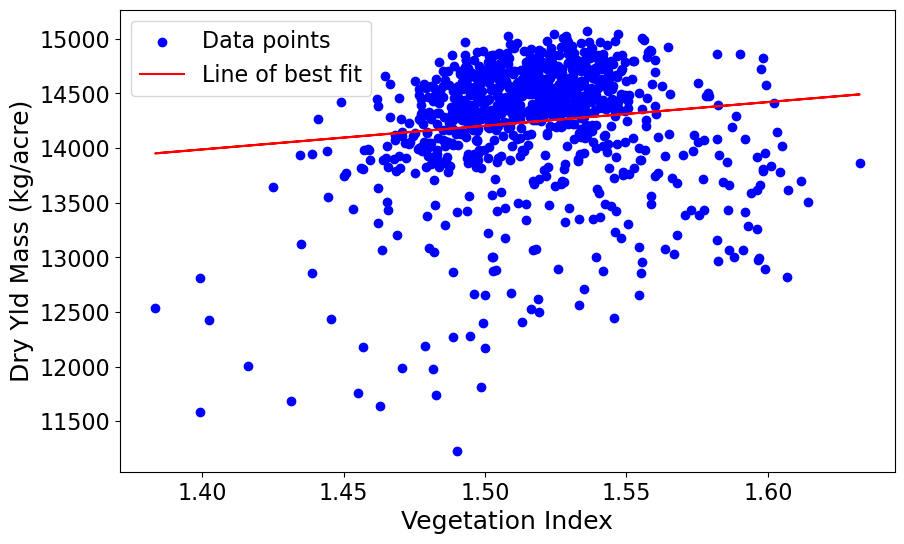

In [39]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_23_2022(pf, var, dependent_var, title)

In [40]:
#import data
pf = pd.read_csv('June_28_2022.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0  1000  2022  6282022  21.464  37.984  20.204  27.759018  0.291577  0.277890   
1  1001  2022  6282022  22.074  38.798  20.385  28.331928  0.292674  0.274740   
2  1002  2022  6282022  25.569  40.439  22.039  30.412739  0.258939  0.225276   
3  1003  2022  6282022  21.765  37.475  20.306  27.631048  0.280967  0.265192   
4  1004  2022  6282022  23.062  39.829  21.445  29.314917  0.283099  0.266604   

       VARI  ...     bottom  Crop Flw(M   Crop Flw(V   Elevation(  Moisture(%  \
0  0.420956  ...  44.077733   21.445978  1378.032271  1144.984501   18.343122   
1  0.413071  ...  44.077694   20.089002  1290.613230  1144.674350   18.378409   
2  0.338193  ...  44.077655   18.870314  1212.318597  1144.504079   18.439327   
3  0.403503  ...  44.077616   19.452807  1249.732449  1144.483531   18.449580   
4  0.404550  ...  44.077577   20.406566  1311.176347  1144.615759   18.472988   

    Yld Mass(D  Yld Vol(Dr  id_old          X          Y  
0  12617.80980  225.317795    1196 -93.529936  44.077728  
1  12522.51934  223.616191    1197 -93.529936  44.077689  
2  12175.47616  217.418975    1198 -93.529936  44.077650  
3  12410.77387  221.620726    1199 -93.529936  44.077611  
4  12654.08193  225.965506    1200 -93.529936  44.077572  

[5 rows x 35 columns]

In [41]:
def plot_correlation_graphs_6_28_2022(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_28_2022.png', bbox_inches='tight')
    plt.show()

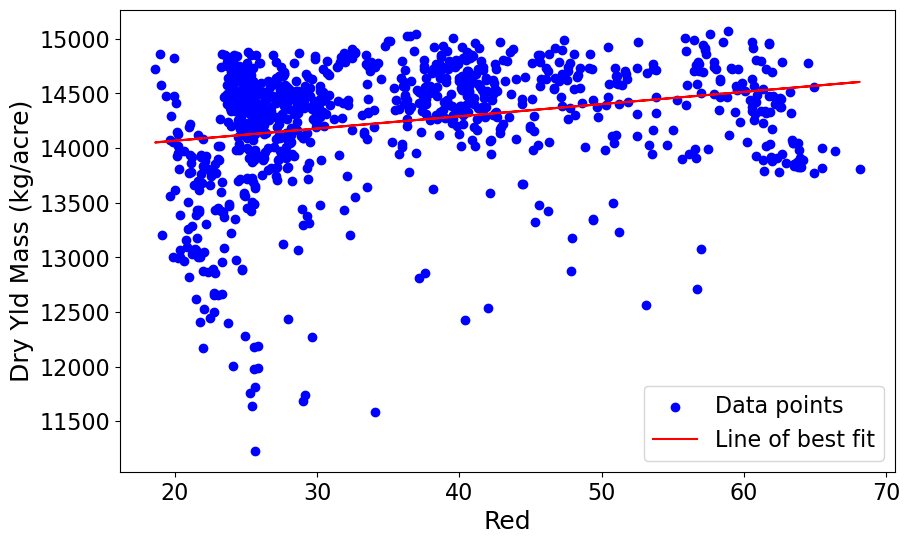

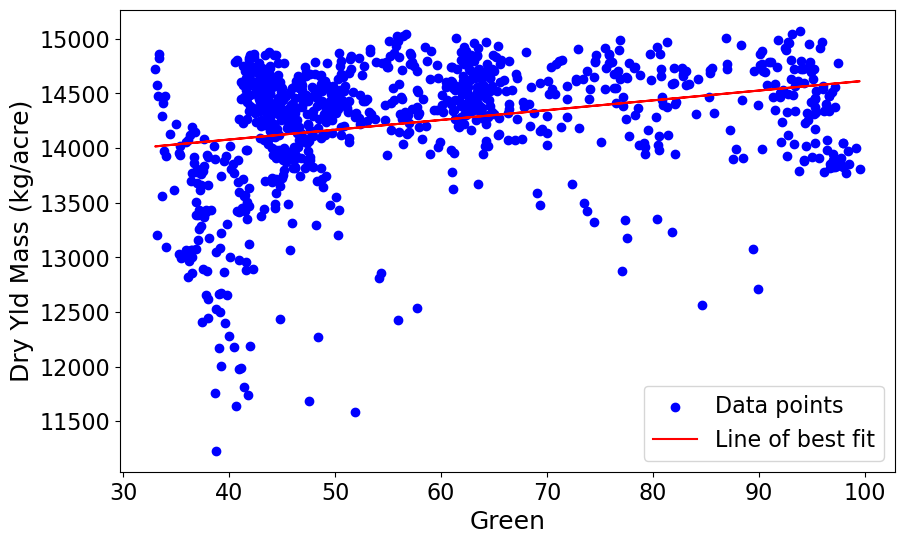

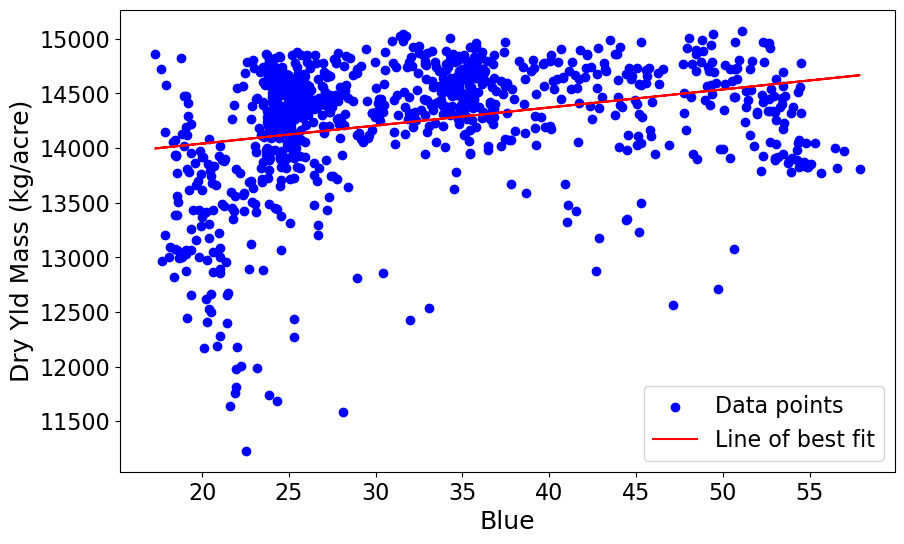

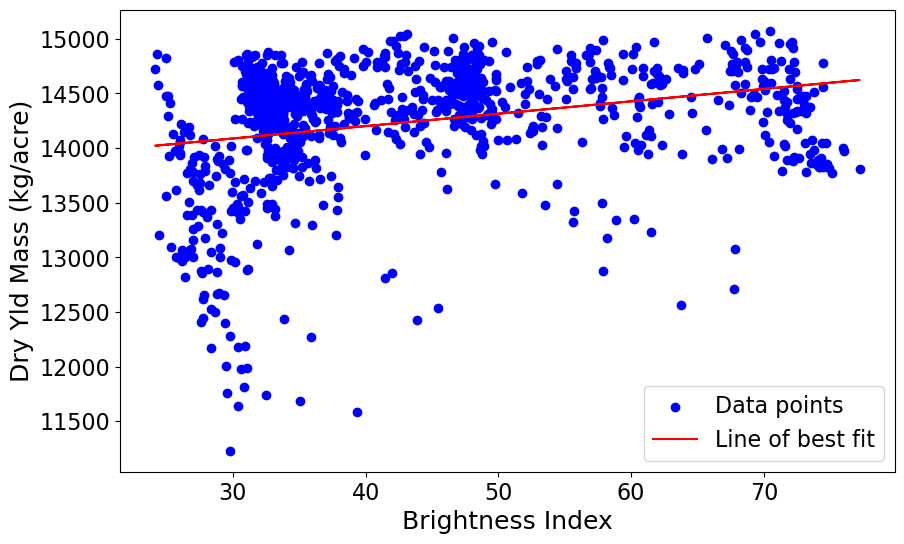

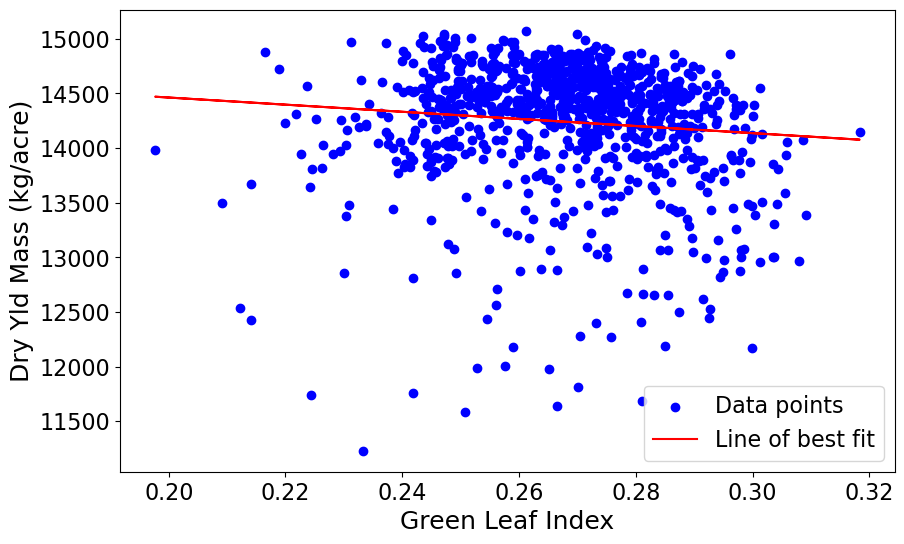

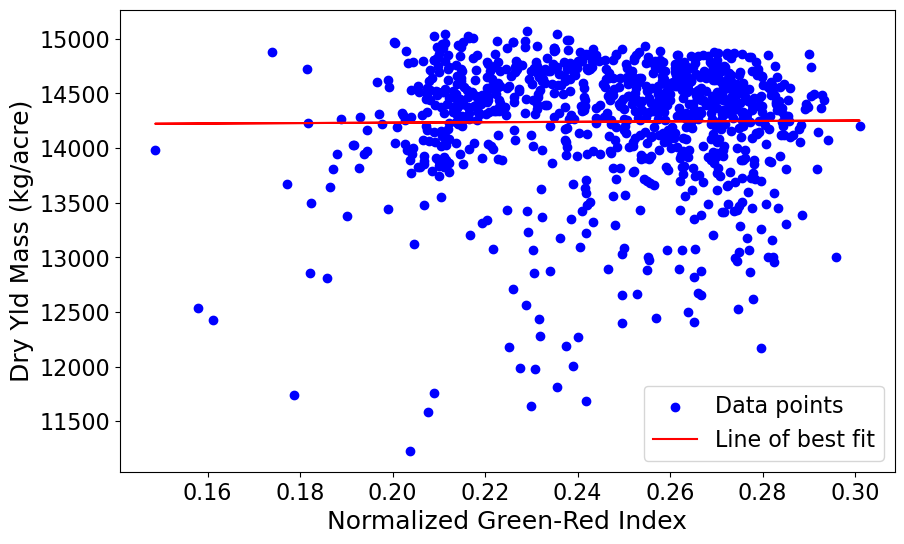

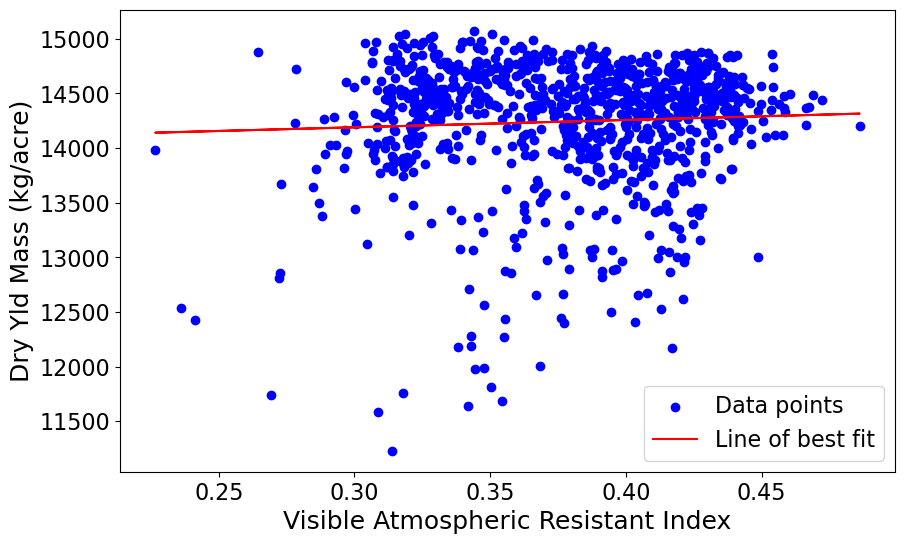

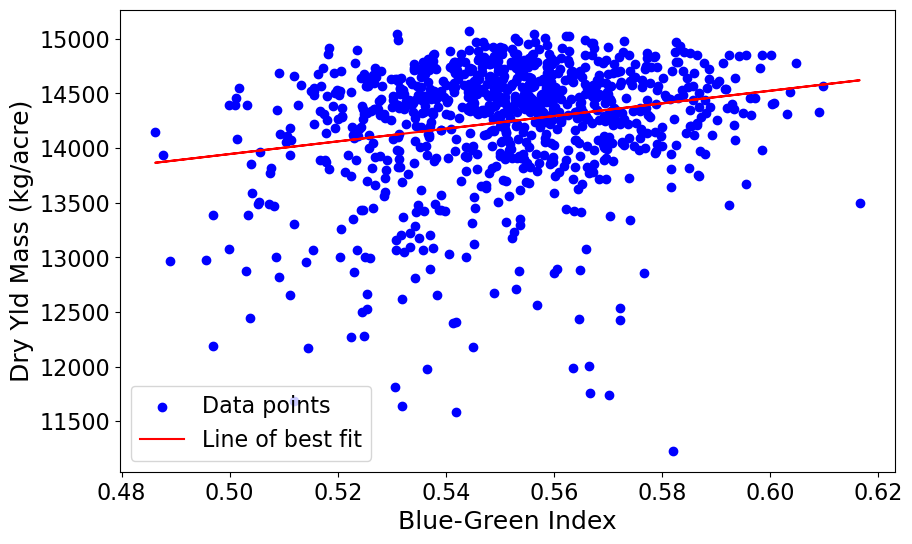

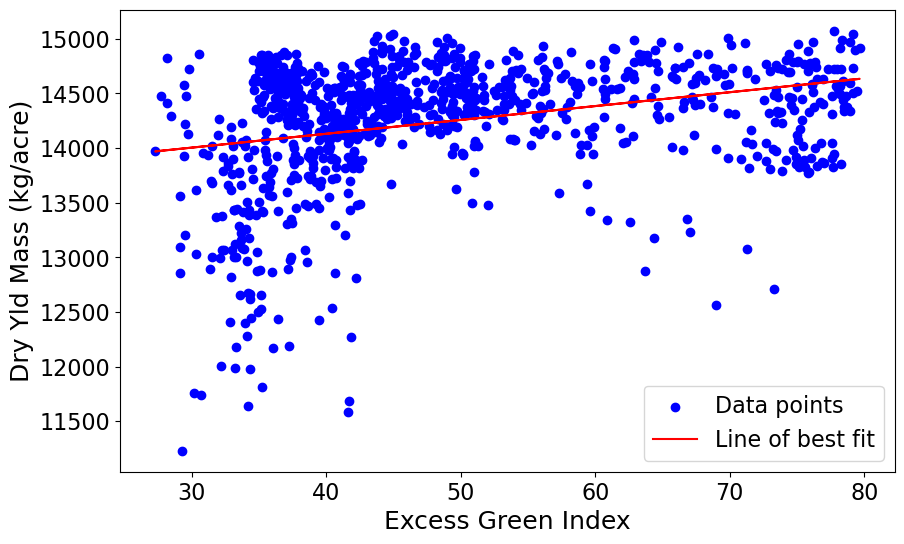

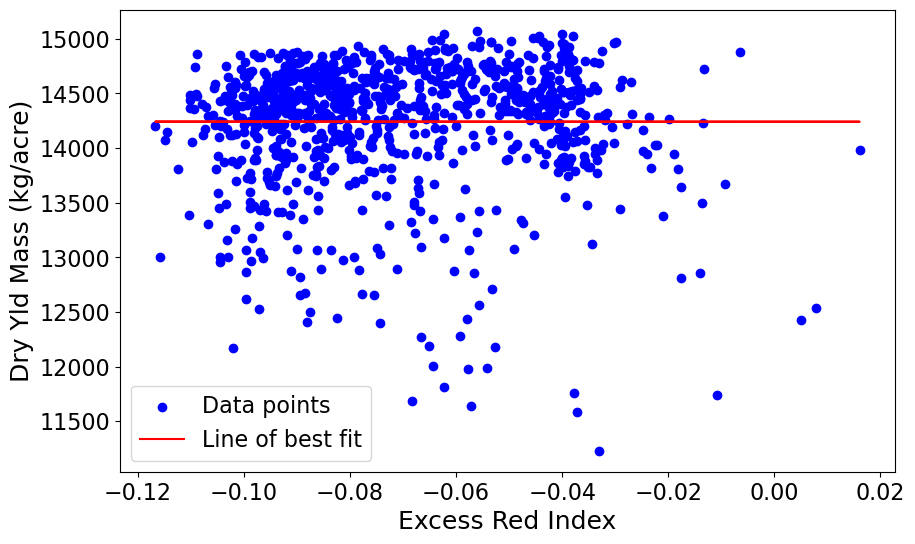

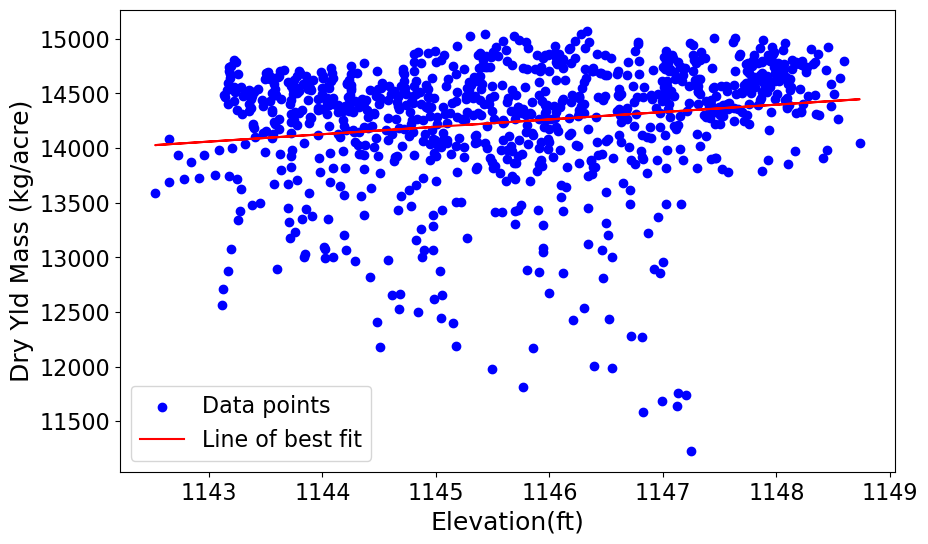

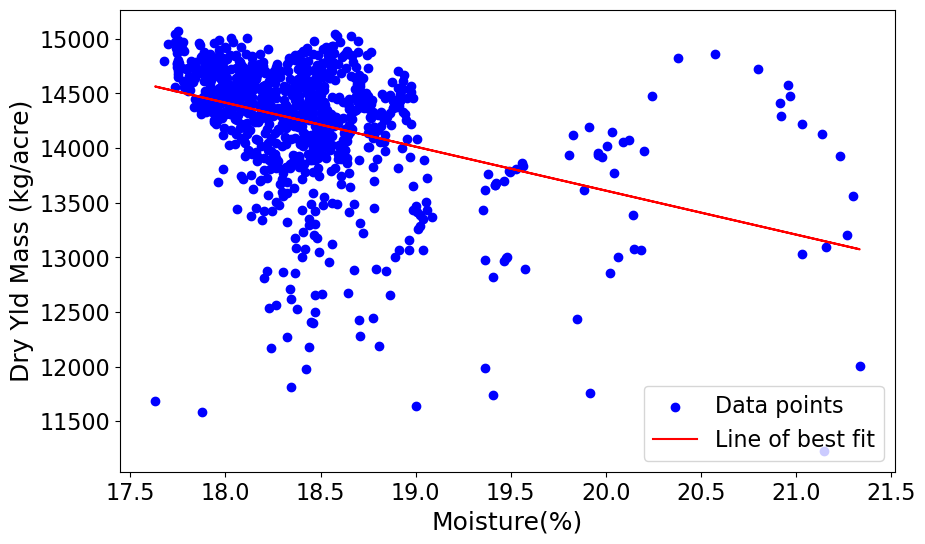

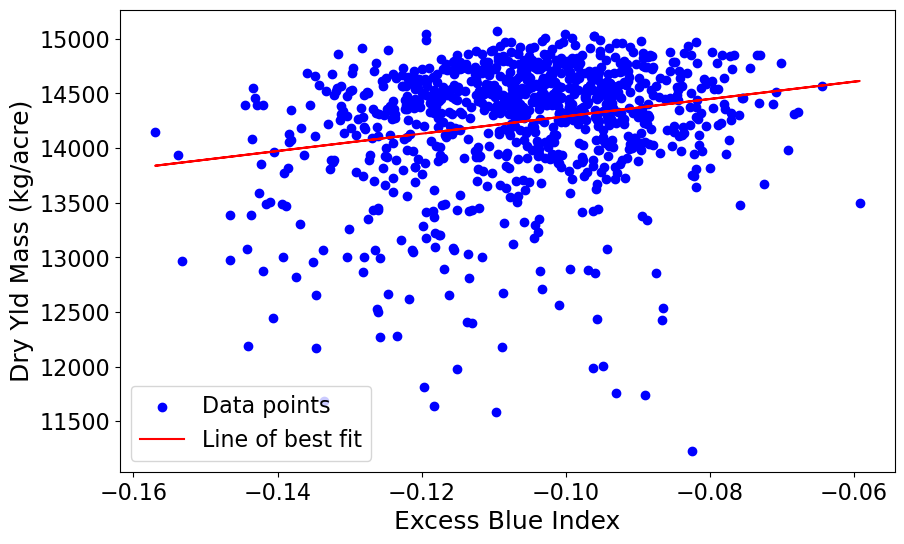

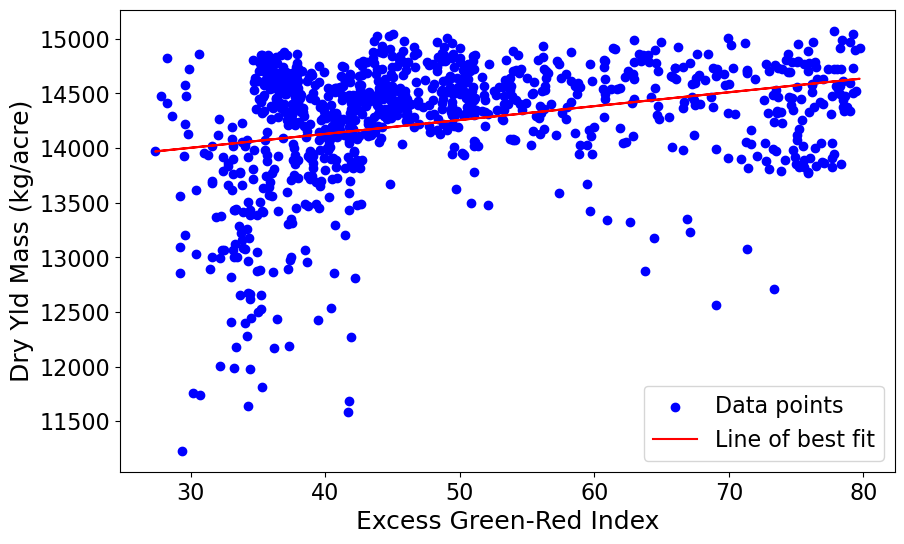

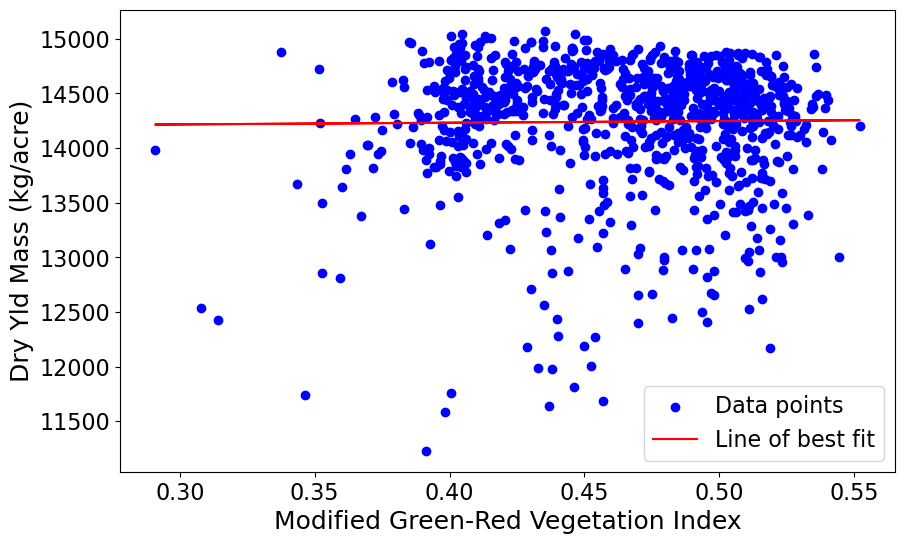

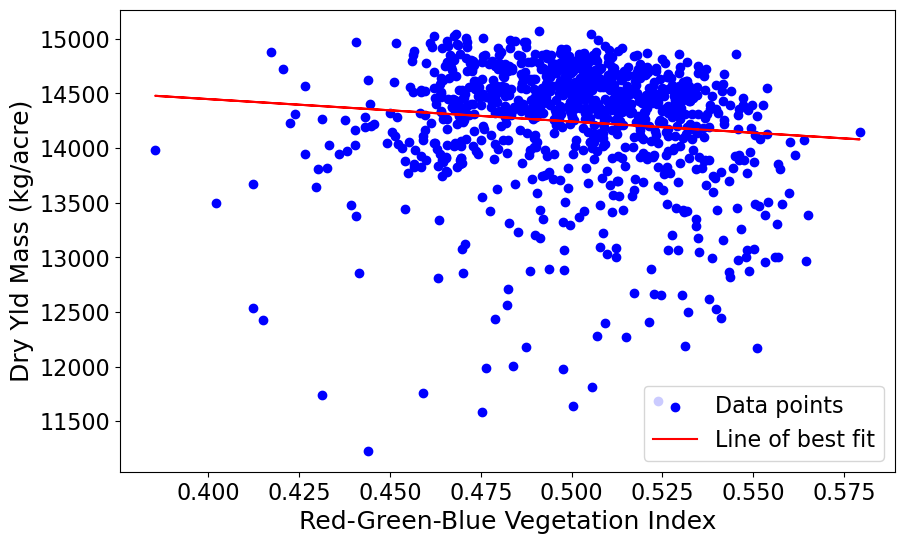

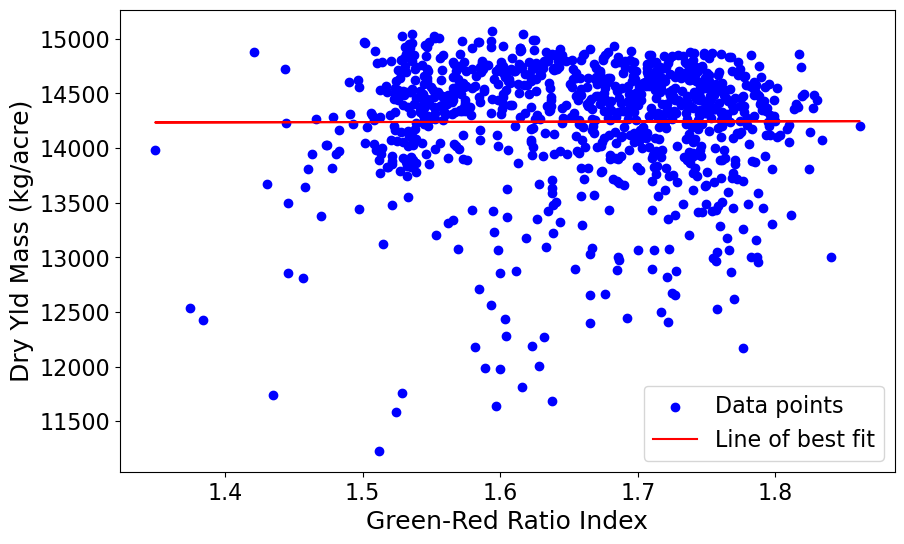

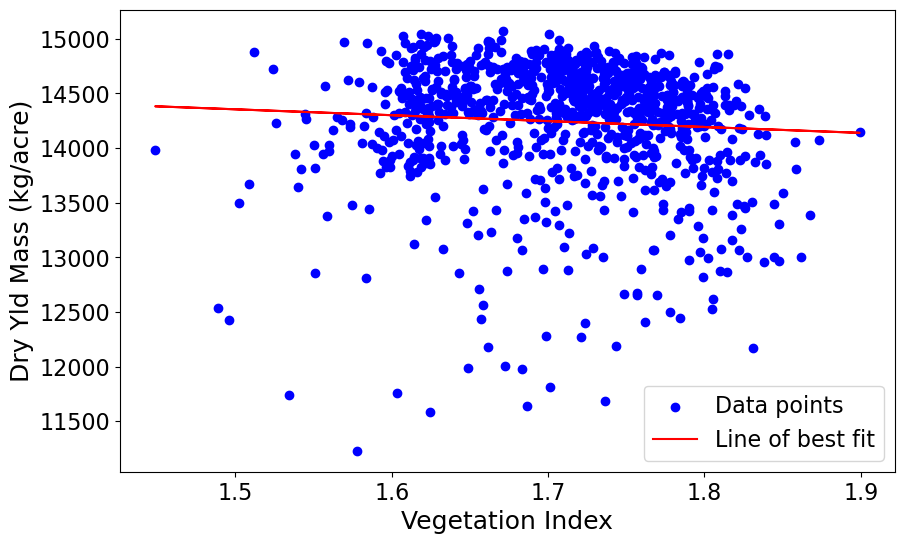

In [43]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_28_2022(pf, var, dependent_var, title)

In [44]:
#import data
pf = pd.read_csv('July_13_2022.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0  1000  2022  7132022  71.464  105.74  65.630  82.855995  0.213401  0.193427   
1  1001  2022  7132022  72.271  104.99  64.322  82.428388  0.211750  0.184581   
2  1002  2022  7132022  74.699  105.55  67.089  84.106435  0.196414  0.171158   
3  1003  2022  7132022  68.715  100.25  59.210  78.054762  0.220979  0.186636   
4  1004  2022  7132022  73.796  106.11  65.831  83.743462  0.206320  0.179616   

       VARI  ...     bottom  Crop Flw(M   Crop Flw(V   Elevation(  Moisture(%  \
0  0.307204  ...  44.077733   21.445978  1378.032271  1144.984501   18.343122   
1  0.289705  ...  44.077694   20.089002  1290.613230  1144.674350   18.378409   
2  0.272632  ...  44.077655   18.870314  1212.318597  1144.504079   18.439327   
3  0.287322  ...  44.077616   19.452807  1249.732449  1144.483531   18.449580   
4  0.283270  ...  44.077577   20.406566  1311.176347  1144.615759   18.472988   

    Yld Mass(D  Yld Vol(Dr  id_old          X          Y  
0  12617.80980  225.317795    1196 -93.529936  44.077728  
1  12522.51934  223.616191    1197 -93.529936  44.077689  
2  12175.47616  217.418975    1198 -93.529936  44.077650  
3  12410.77387  221.620726    1199 -93.529936  44.077611  
4  12654.08193  225.965506    1200 -93.529936  44.077572  

[5 rows x 35 columns]

In [45]:
def plot_correlation_graphs_7_13_2022(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_7_13_2022.png', bbox_inches='tight')
    plt.show()

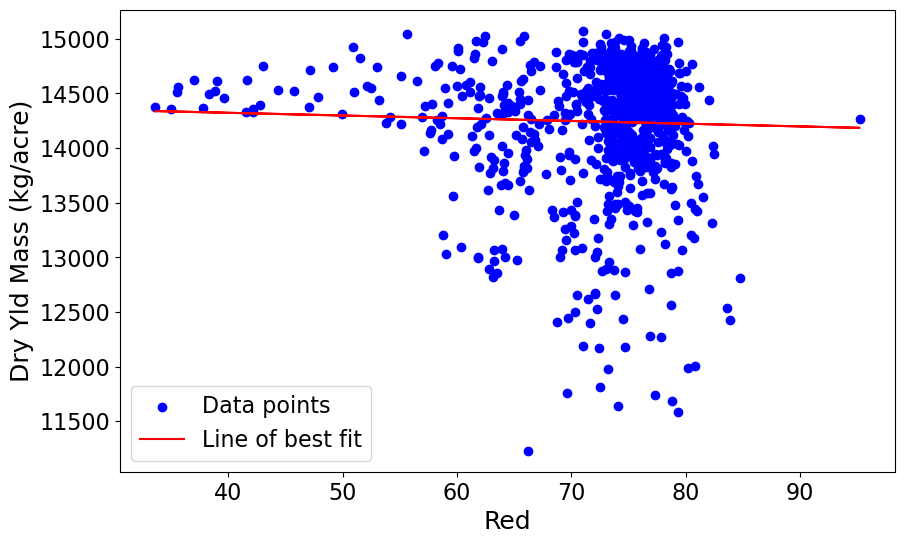

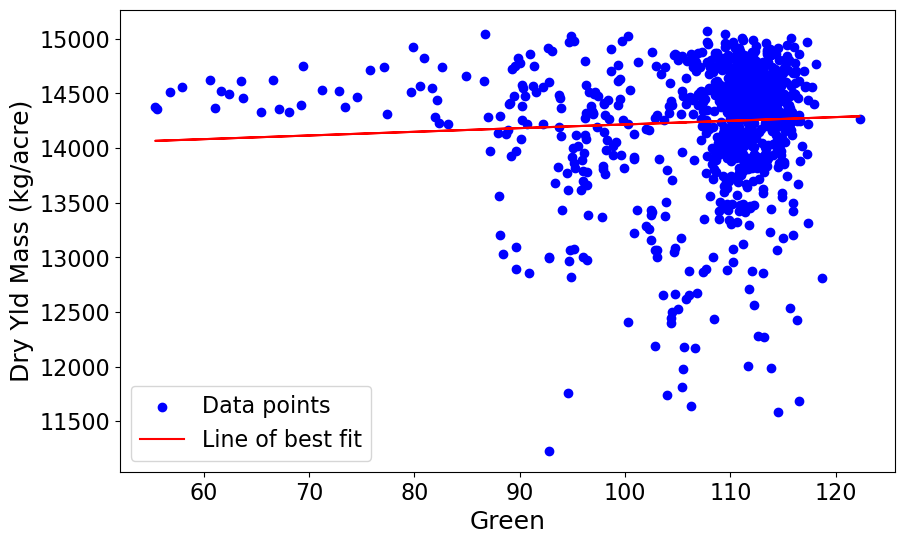

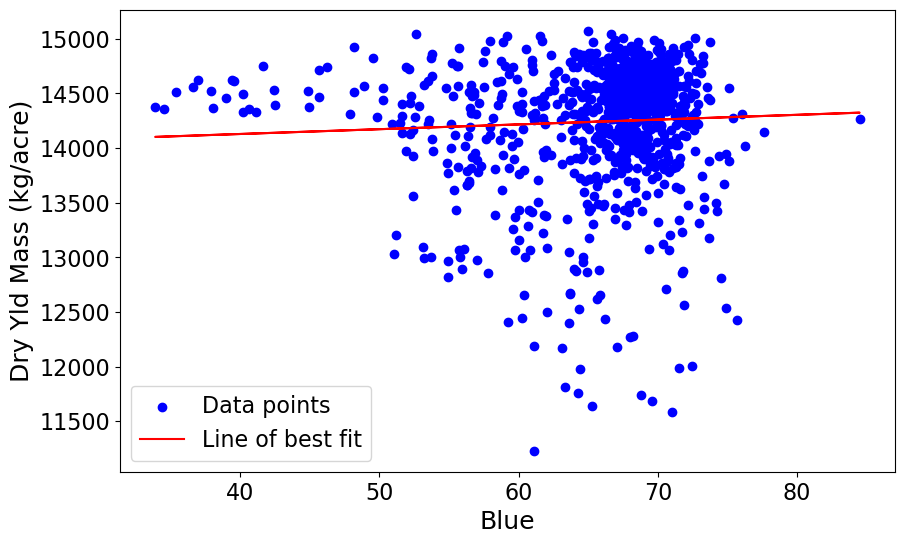

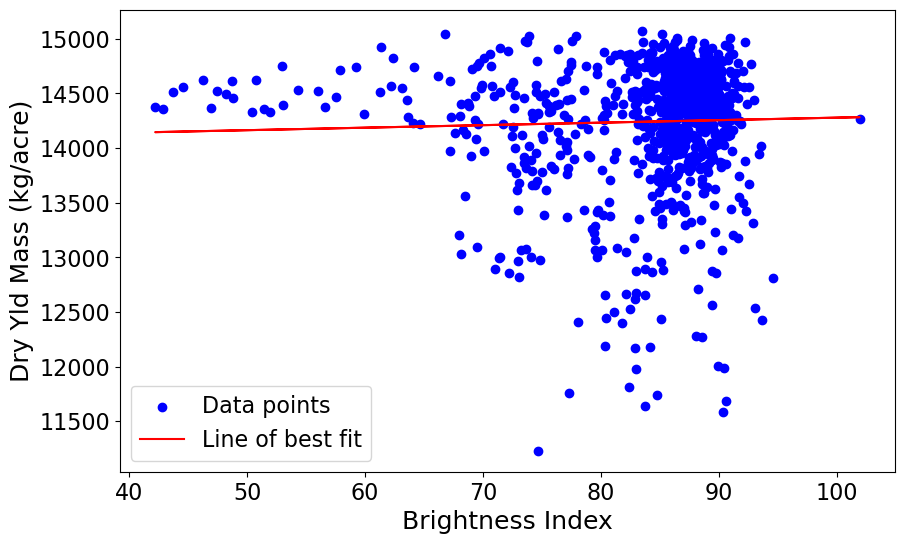

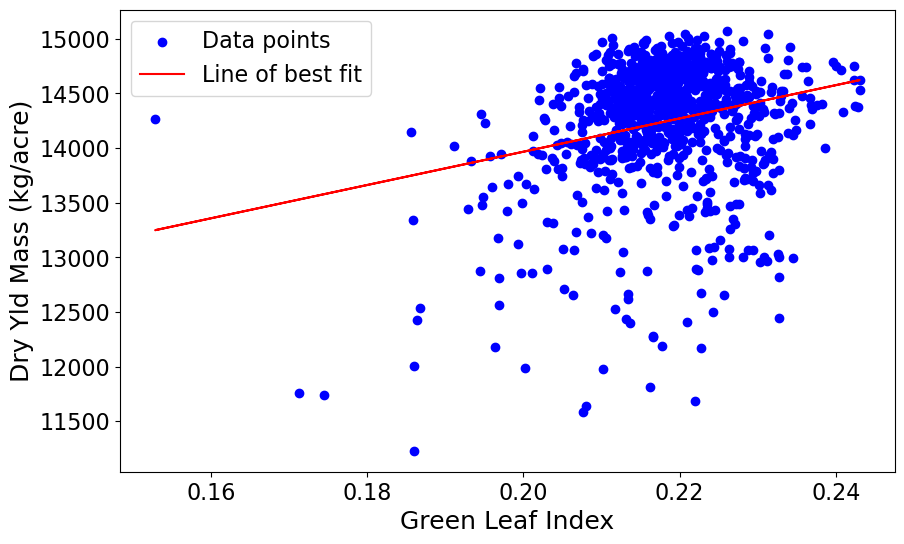

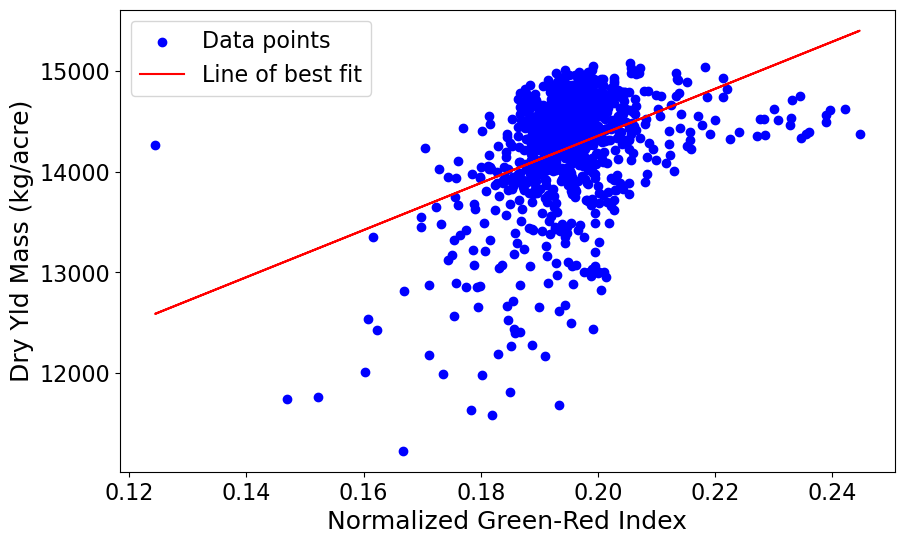

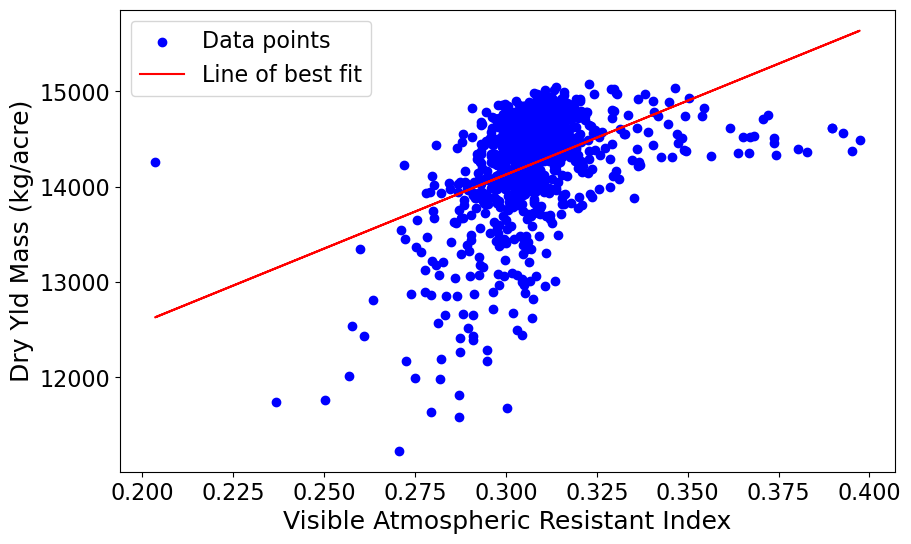

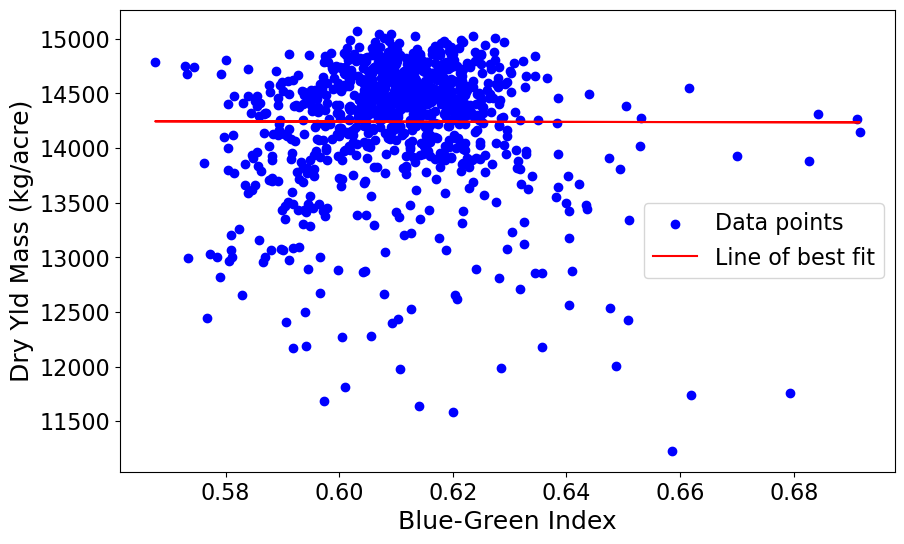

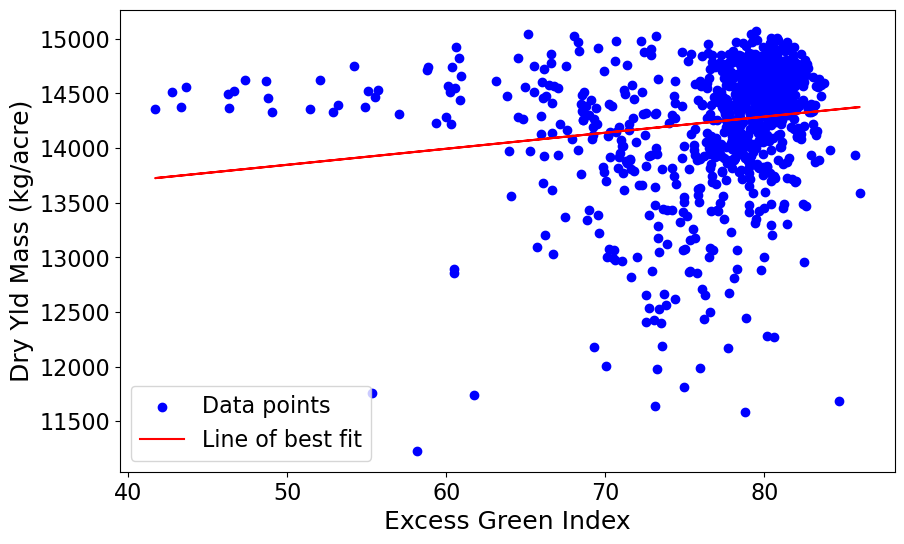

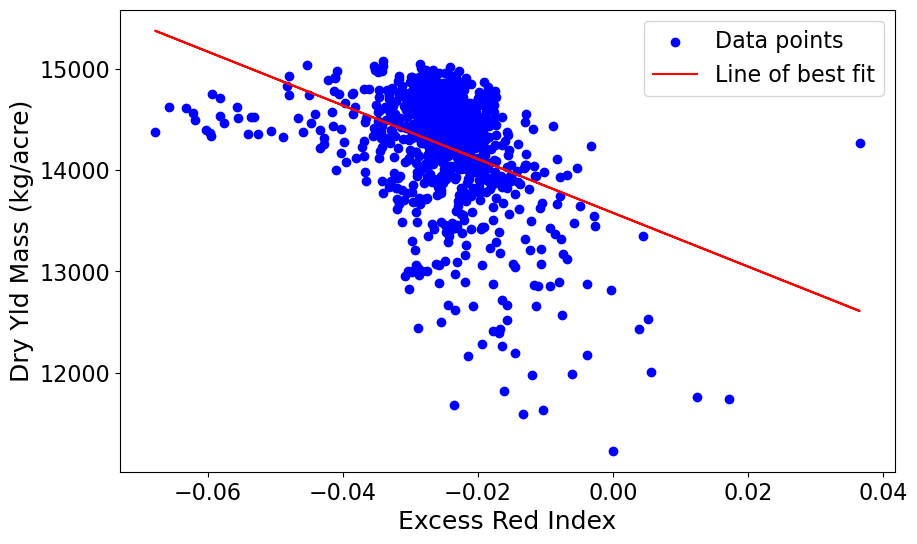

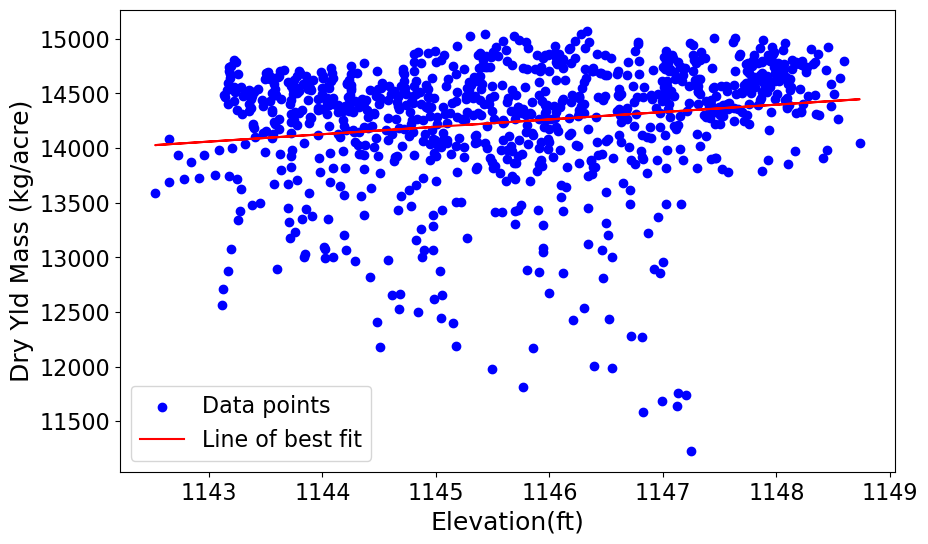

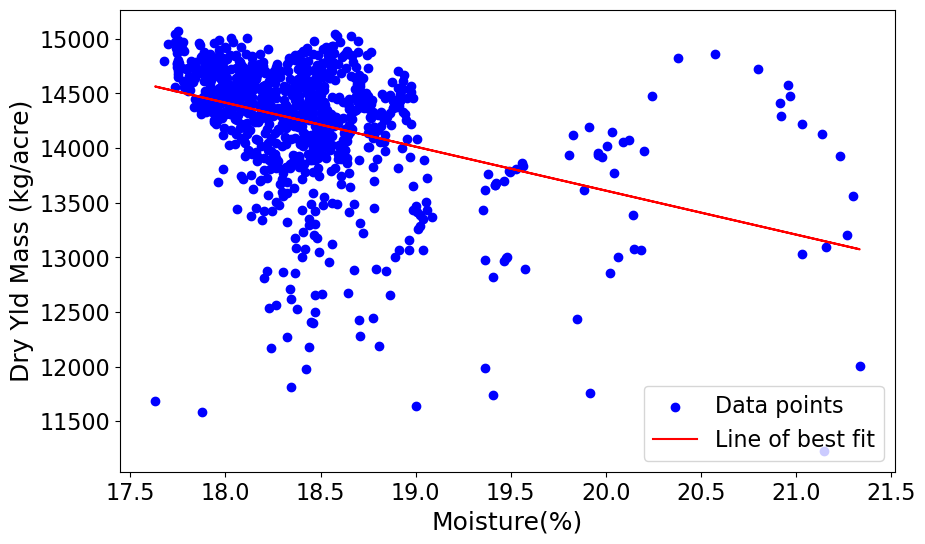

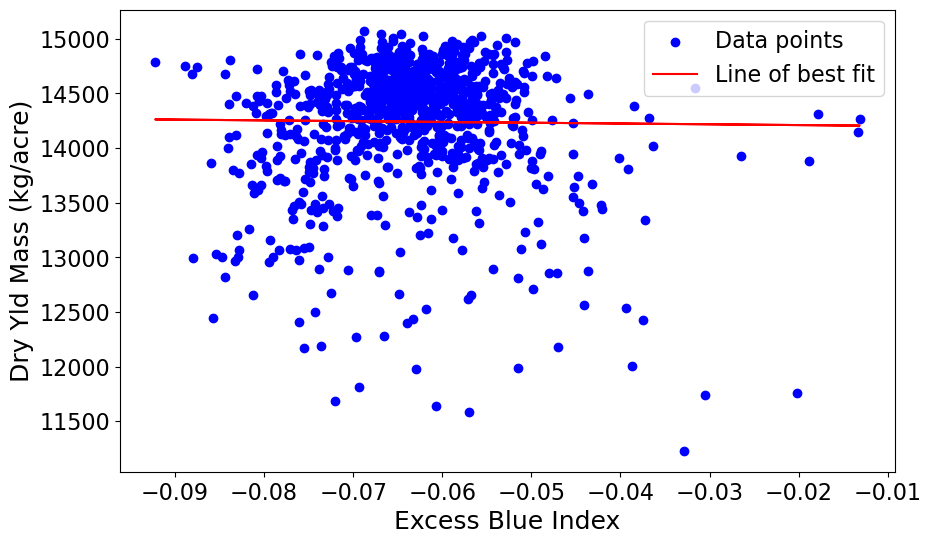

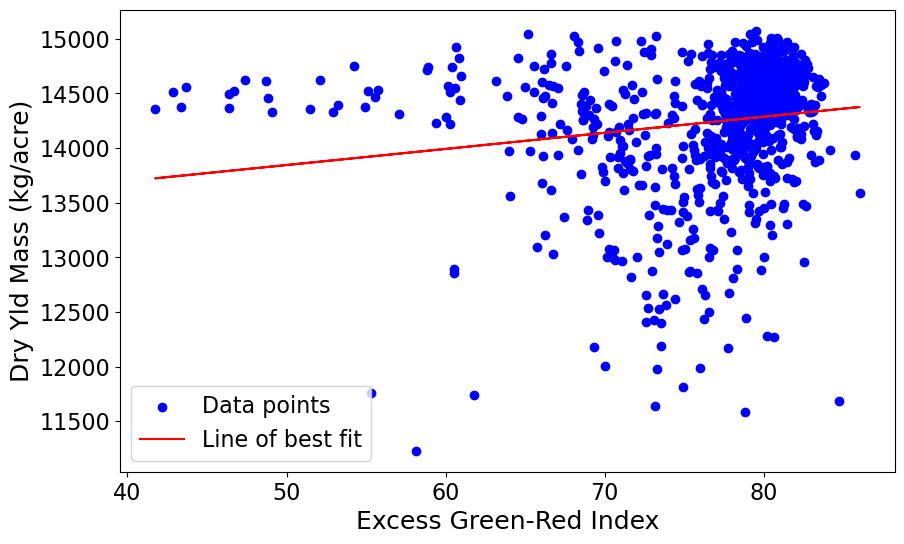

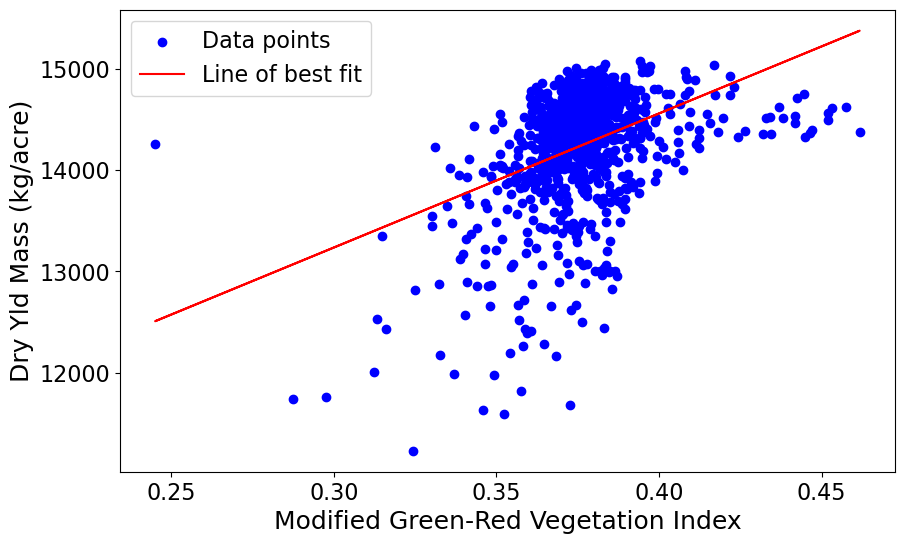

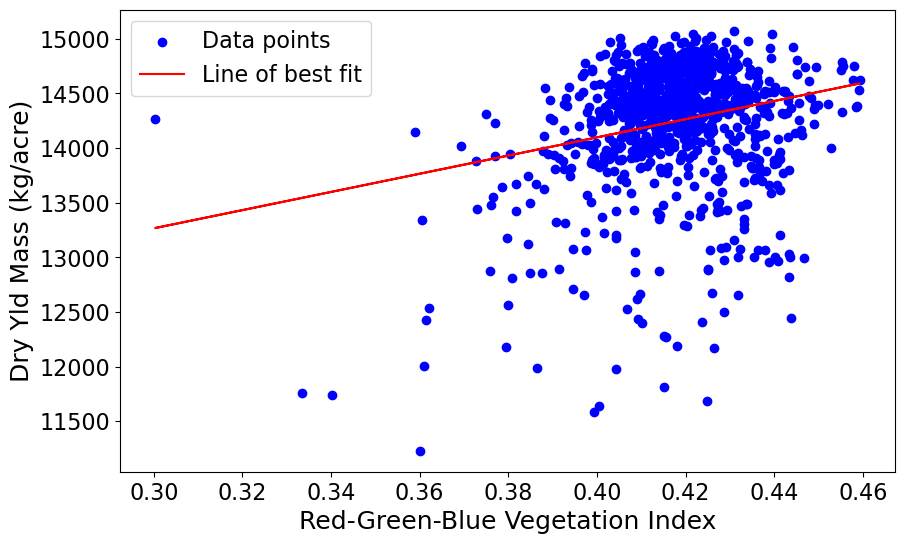

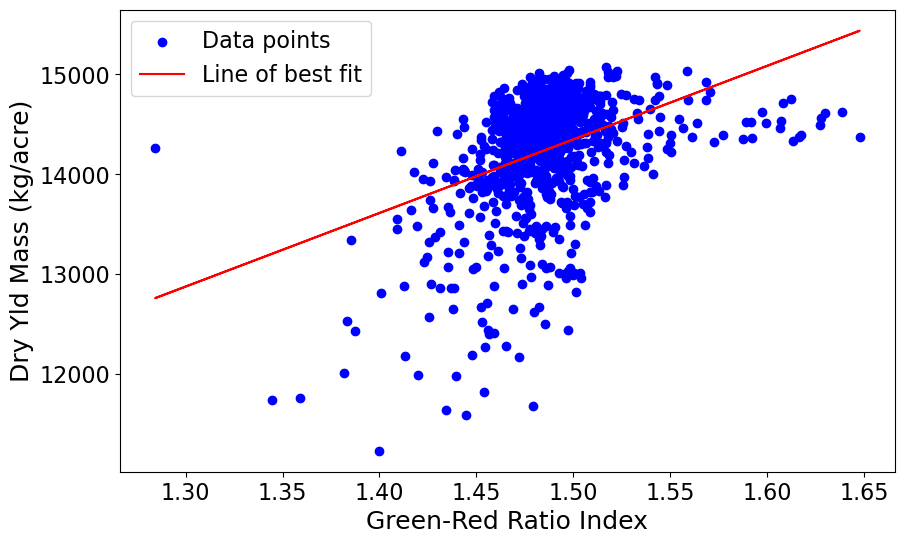

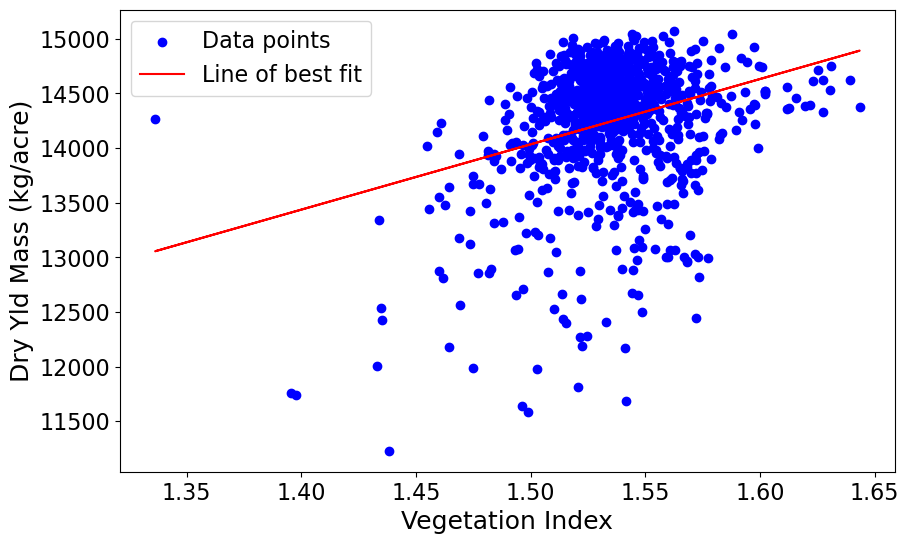

In [46]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_7_13_2022(pf, var, dependent_var, title)